# Telecom Churn Case Study

## Problem Statement

The telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
This analysis is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
We will define high-value customers based on a certain metric and predict churn only on high-value customers.

## Contents:
**1. Import libraries and load data** <br>
**2. Data Cleaning** <br>
    i. Handling missing values <br>
    ii. Advanced imputation <br>
    iii. Filter data for high value customers <br>
**3. Feature Engineering - I** <br>
    i. Creating the target variable <br>
    ii. Creating phase variables <br>
**4. Exploratory Data Analysis (EDA)** (including outlier handling) <br>
    i. Univariate Analysis <br>
    ii. Bivariate Analysis <br>
**5. Data preprocessing**

## 1. Import libraries and load data

In [226]:
# Import libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from fancyimpute import KNN
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [227]:
# from google.colab import drive

# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [228]:
# Check encoding of the data file

import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc

find_encoding('/content/gdrive/MyDrive/Upgrad/telecom_churn_data.csv')
find_encoding()

In [229]:
# Read the data

data = pd.read_csv('/content/gdrive/MyDrive/Upgrad/telecom_churn_data.csv', encoding = 'ascii')

In [230]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [231]:
data.shape

(99999, 226)

In [232]:
data['mobile_number'].nunique()

99999

We have the data of 99,999 mobile numbers and 225 attributes for each mobile number.

## 2. Data Cleaning

### i. Handling missing values

In [233]:
# Finding missing values

100*data.isnull().sum()/data.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

There are a lot of columns in the data that have a very high percentage of missing values (more than 70%). 

The columns with high percentage of missing values are the columns that indicate the data about the mobile internet recharge. It might indicate that there was no mobile internet recharge. Let's first look at the minimum recharge amount to see if zero recharges are captured as 0 or as NA.

In [234]:
# Inspecting the minimum values of number of recharges and amount of recharges

print("Minimum of recharge amount in Jun: ", data['total_rech_data_6'].min())
print("Minimum of recharge amount in Jul: ", data['total_rech_data_7'].min())
print("Minimum of recharge amount in Aug: ", data['total_rech_data_8'].min())
print("Minimum of recharge amount in Sep: ", data['total_rech_data_9'].min())
print("Minimum of maximum recharge amount in Jun: ", data['max_rech_data_6'].min())
print("Minimum of maximum recharge amount in Jul: ", data['max_rech_data_7'].min())
print("Minimum of maximum recharge amount in Aug: ", data['max_rech_data_8'].min())
print("Minimum of maximum recharge amount in Sep: ", data['max_rech_data_9'].min())
print("Minimum of count of recharges in Jun: ", (data['count_rech_2g_6'] + data['count_rech_3g_6']).min())
print("Minimum of count of recharges in Jul: ", (data['count_rech_2g_7'] + data['count_rech_3g_7']).min())
print("Minimum of count of recharges in Aug: ", (data['count_rech_2g_8'] + data['count_rech_3g_8']).min())
print("Minimum of count of recharges in Sep: ", (data['count_rech_2g_9'] + data['count_rech_3g_9']).min())
print("Minimum of average recharge amount in Jun: ", data['av_rech_amt_data_6'].min())
print("Minimum of average recharge amount in Jul: ", data['av_rech_amt_data_7'].min())
print("Minimum of average recharge amount in Aug: ", data['av_rech_amt_data_8'].min())
print("Minimum of average recharge amount in Sep: ", data['av_rech_amt_data_9'].min())

Minimum of recharge amount in Jun:  1.0
Minimum of recharge amount in Jul:  1.0
Minimum of recharge amount in Aug:  1.0
Minimum of recharge amount in Sep:  1.0
Minimum of maximum recharge amount in Jun:  1.0
Minimum of maximum recharge amount in Jul:  1.0
Minimum of maximum recharge amount in Aug:  1.0
Minimum of maximum recharge amount in Sep:  1.0
Minimum of count of recharges in Jun:  1.0
Minimum of count of recharges in Jul:  1.0
Minimum of count of recharges in Aug:  1.0
Minimum of count of recharges in Sep:  1.0
Minimum of average recharge amount in Jun:  1.0
Minimum of average recharge amount in Jul:  0.5
Minimum of average recharge amount in Aug:  0.5
Minimum of average recharge amount in Sep:  1.0


We can clearly see that the customers who did not make a recharge are not captured as 0 in recharge amount and recharge counts. So, the NA values represent these.

In [235]:
# Replacing missing values with 0

data['total_rech_data_6'].fillna(0, inplace = True)
data['total_rech_data_7'].fillna(0, inplace = True)
data['total_rech_data_8'].fillna(0, inplace = True)
data['total_rech_data_9'].fillna(0, inplace = True)
data['max_rech_data_6'].fillna(0, inplace = True)
data['max_rech_data_7'].fillna(0, inplace = True)
data['max_rech_data_8'].fillna(0, inplace = True)
data['max_rech_data_9'].fillna(0, inplace = True)
data['count_rech_2g_6'].fillna(0, inplace = True)
data['count_rech_2g_7'].fillna(0, inplace = True)
data['count_rech_2g_8'].fillna(0, inplace = True)
data['count_rech_2g_9'].fillna(0, inplace = True)
data['count_rech_3g_6'].fillna(0, inplace = True)
data['count_rech_3g_7'].fillna(0, inplace = True)
data['count_rech_3g_8'].fillna(0, inplace = True)
data['count_rech_3g_9'].fillna(0, inplace = True)
data['av_rech_amt_data_6'].fillna(0, inplace = True)
data['av_rech_amt_data_7'].fillna(0, inplace = True)
data['av_rech_amt_data_8'].fillna(0, inplace = True)
data['av_rech_amt_data_9'].fillna(0, inplace = True)

Since we already have the data of mobile internet recharges in the variables above and the additional mobile internet costs in the vbc_3g variables, we can drop the arpu_3g and arpu_2g columns which also have a very high percentage of missing values.

the fb_user variables will also be a subset of the mobile internet variables since one cannot use Social networking sites without internet. So, we can drop this column too. <br>
The missing values in the night_pck_user variable indicate that the user is not a user of the night pack prepaid services. So, we can impute the missing values with 0.

In [236]:
# Dropping the arpu_3g, arpu_2g and fb_user variables

data.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], axis = 1, inplace = True)

In [237]:
# Replacing missing values in night_pck_user with 0

data['night_pck_user_6'].fillna(0, inplace = True)
data['night_pck_user_7'].fillna(0, inplace = True)
data['night_pck_user_8'].fillna(0, inplace = True)
data['night_pck_user_9'].fillna(0, inplace = True)

In [238]:
# Removing date_of_last_rech_data

data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], axis = 1, inplace = True)


In [239]:
# Finding missing values

100*data.isnull().sum()/data.shape[0]

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [240]:
# Columns which are less significant and columns which have only 0s and Nulls
drop_cols = ['std_og_t2o_mou', 'loc_ic_t2o_mou', 'circle_id', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'loc_og_t2o_mou']

In [241]:
# Dropping insignificant columns

data.drop(drop_cols, axis = 1, inplace = True)

In [242]:
# Finding missing values

100*data.isnull().sum()/data.shape[0]

mobile_number           0.000000
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t_mou_7        3.859039
loc_og_t2t_mou_8        5.378054
loc_og_t2t_mou_9        7.745077
loc_og_t2m_mou_6        3.937039
loc_og_t2m

Now, none of the columns have missing percentage greater than 10%. 

In [243]:
# Columns having Object datatype 

obj_cols = data.select_dtypes(include ='object').columns
obj_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

All these columns are date columns. Let's convert these to datetime format.

In [244]:
# Converting date columns to datetime format

for i in obj_cols:
    data[i] = pd.to_datetime(data[i])

In [245]:
data.dtypes

mobile_number                    int64
last_date_of_month_6    datetime64[ns]
last_date_of_month_7    datetime64[ns]
last_date_of_month_8    datetime64[ns]
last_date_of_month_9    datetime64[ns]
arpu_6                         float64
arpu_7                         float64
arpu_8                         float64
arpu_9                         float64
onnet_mou_6                    float64
onnet_mou_7                    float64
onnet_mou_8                    float64
onnet_mou_9                    float64
offnet_mou_6                   float64
offnet_mou_7                   float64
offnet_mou_8                   float64
offnet_mou_9                   float64
roam_ic_mou_6                  float64
roam_ic_mou_7                  float64
roam_ic_mou_8                  float64
roam_ic_mou_9                  float64
roam_og_mou_6                  float64
roam_og_mou_7                  float64
roam_og_mou_8                  float64
roam_og_mou_9                  float64
loc_og_t2t_mou_6         

Now, all columns are either numeric or datetime.

These date variables do not give any information that is crucial for the business case as we are only considering usage based churn and won't need the last dates of recharges. So, we can drop these columns.

In [246]:
# Dropping date columns

data.drop(obj_cols, axis = 1, inplace = True)

### ii. Advanced imputation

In [247]:
# Creating Subset Dataframes to feed into the KNN aglorithm to avoid Python crashing

df_1 = data.iloc[:5000,:] 
df_2 = data.iloc[5000:10000,:]
df_3 = data.iloc[10000:15000,:]
df_4 = data.iloc[15000:20000,:]
df_5 = data.iloc[20000:25000,:]
df_6 = data.iloc[25000:30000,:]
df_7 = data.iloc[30000:35000,:]
df_8 = data.iloc[35000:40000,:]
df_9 = data.iloc[40000:45000,:]
df_10 = data.iloc[45000:50000,:]
df_11 = data.iloc[50000:55000,:]
df_12 = data.iloc[55000:60000,:]
df_13 = data.iloc[60000:65000,:]
df_14 = data.iloc[65000:70000,:]
df_15 = data.iloc[70000:75000,:]
df_16 = data.iloc[75000:80000,:]
df_17 = data.iloc[80000:85000,:]
df_18 = data.iloc[85000:90000,:]
df_19 = data.iloc[90000:95000,:]
df_20 = data.iloc[95000:,:]

In [248]:
# Imputing using fancyimpute

KNN_impute = KNN(3)
X_filled_knn_1 = pd.DataFrame(KNN_impute.fit_transform(df_1))
# print(X_filled_knn_1.shape)

Imputing row 1/5000 with 82 missing, elapsed time: 22.657
Imputing row 101/5000 with 0 missing, elapsed time: 22.676
Imputing row 201/5000 with 0 missing, elapsed time: 22.692
Imputing row 301/5000 with 28 missing, elapsed time: 22.722
Imputing row 401/5000 with 0 missing, elapsed time: 22.739
Imputing row 501/5000 with 82 missing, elapsed time: 22.754
Imputing row 601/5000 with 0 missing, elapsed time: 22.772
Imputing row 701/5000 with 0 missing, elapsed time: 22.788
Imputing row 801/5000 with 0 missing, elapsed time: 22.803
Imputing row 901/5000 with 0 missing, elapsed time: 22.819
Imputing row 1001/5000 with 0 missing, elapsed time: 22.830
Imputing row 1101/5000 with 0 missing, elapsed time: 22.838
Imputing row 1201/5000 with 0 missing, elapsed time: 22.856
Imputing row 1301/5000 with 0 missing, elapsed time: 22.879
Imputing row 1401/5000 with 0 missing, elapsed time: 22.889
Imputing row 1501/5000 with 82 missing, elapsed time: 22.910
Imputing row 1601/5000 with 0 missing, elapsed t

In [249]:
# Imputing using fancyimpute

X_filled_knn_2 = pd.DataFrame(KNN_impute.fit_transform(df_2))
# print(X_filled_knn_2.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.645
Imputing row 101/5000 with 0 missing, elapsed time: 22.661
Imputing row 201/5000 with 0 missing, elapsed time: 22.677
Imputing row 301/5000 with 0 missing, elapsed time: 22.696
Imputing row 401/5000 with 0 missing, elapsed time: 22.710
Imputing row 501/5000 with 0 missing, elapsed time: 22.720
Imputing row 601/5000 with 0 missing, elapsed time: 22.736
Imputing row 701/5000 with 0 missing, elapsed time: 22.744
Imputing row 801/5000 with 27 missing, elapsed time: 22.756
Imputing row 901/5000 with 0 missing, elapsed time: 22.775
Imputing row 1001/5000 with 0 missing, elapsed time: 22.797
Imputing row 1101/5000 with 0 missing, elapsed time: 22.816
Imputing row 1201/5000 with 0 missing, elapsed time: 22.832
Imputing row 1301/5000 with 0 missing, elapsed time: 22.842
Imputing row 1401/5000 with 0 missing, elapsed time: 22.869
Imputing row 1501/5000 with 0 missing, elapsed time: 22.883
Imputing row 1601/5000 with 0 missing, elapsed time

In [250]:
# Imputing using fancyimpute

X_filled_knn_3 = pd.DataFrame(KNN_impute.fit_transform(df_3))
# print(X_filled_knn_3.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.492
Imputing row 101/5000 with 0 missing, elapsed time: 22.510
Imputing row 201/5000 with 0 missing, elapsed time: 22.525
Imputing row 301/5000 with 0 missing, elapsed time: 22.540
Imputing row 401/5000 with 28 missing, elapsed time: 22.555
Imputing row 501/5000 with 0 missing, elapsed time: 22.567
Imputing row 601/5000 with 0 missing, elapsed time: 22.575
Imputing row 701/5000 with 0 missing, elapsed time: 22.598
Imputing row 801/5000 with 0 missing, elapsed time: 22.623
Imputing row 901/5000 with 0 missing, elapsed time: 22.647
Imputing row 1001/5000 with 0 missing, elapsed time: 22.663
Imputing row 1101/5000 with 0 missing, elapsed time: 22.683
Imputing row 1201/5000 with 54 missing, elapsed time: 22.698
Imputing row 1301/5000 with 0 missing, elapsed time: 22.726
Imputing row 1401/5000 with 0 missing, elapsed time: 22.742
Imputing row 1501/5000 with 0 missing, elapsed time: 22.767
Imputing row 1601/5000 with 0 missing, elapsed tim

In [251]:
# Imputing using fancyimpute

X_filled_knn_4 = pd.DataFrame(KNN_impute.fit_transform(df_4))
# print(X_filled_knn_4.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.365
Imputing row 101/5000 with 28 missing, elapsed time: 22.382
Imputing row 201/5000 with 28 missing, elapsed time: 22.396
Imputing row 301/5000 with 0 missing, elapsed time: 22.413
Imputing row 401/5000 with 0 missing, elapsed time: 22.433
Imputing row 501/5000 with 0 missing, elapsed time: 22.457
Imputing row 601/5000 with 0 missing, elapsed time: 22.471
Imputing row 701/5000 with 0 missing, elapsed time: 22.480
Imputing row 801/5000 with 0 missing, elapsed time: 22.493
Imputing row 901/5000 with 0 missing, elapsed time: 22.512
Imputing row 1001/5000 with 0 missing, elapsed time: 22.527
Imputing row 1101/5000 with 0 missing, elapsed time: 22.544
Imputing row 1201/5000 with 0 missing, elapsed time: 22.564
Imputing row 1301/5000 with 0 missing, elapsed time: 22.583
Imputing row 1401/5000 with 0 missing, elapsed time: 22.595
Imputing row 1501/5000 with 0 missing, elapsed time: 22.614
Imputing row 1601/5000 with 0 missing, elapsed tim

In [252]:
# Imputing using fancyimpute

X_filled_knn_5 = pd.DataFrame(KNN_impute.fit_transform(df_5))
# print(X_filled_knn_5.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.754
Imputing row 101/5000 with 0 missing, elapsed time: 22.774
Imputing row 201/5000 with 0 missing, elapsed time: 22.787
Imputing row 301/5000 with 0 missing, elapsed time: 22.806
Imputing row 401/5000 with 0 missing, elapsed time: 22.822
Imputing row 501/5000 with 0 missing, elapsed time: 22.833
Imputing row 601/5000 with 0 missing, elapsed time: 22.848
Imputing row 701/5000 with 0 missing, elapsed time: 22.871
Imputing row 801/5000 with 0 missing, elapsed time: 22.890
Imputing row 901/5000 with 0 missing, elapsed time: 22.915
Imputing row 1001/5000 with 0 missing, elapsed time: 22.930
Imputing row 1101/5000 with 0 missing, elapsed time: 22.949
Imputing row 1201/5000 with 0 missing, elapsed time: 22.974
Imputing row 1301/5000 with 0 missing, elapsed time: 22.993
Imputing row 1401/5000 with 0 missing, elapsed time: 23.006
Imputing row 1501/5000 with 109 missing, elapsed time: 23.022
Imputing row 1601/5000 with 0 missing, elapsed tim

In [253]:
# Imputing using fancyimpute

X_filled_knn_6 = pd.DataFrame(KNN_impute.fit_transform(df_6))
# print(X_filled_knn_6.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.723
Imputing row 101/5000 with 0 missing, elapsed time: 22.736
Imputing row 201/5000 with 0 missing, elapsed time: 22.764
Imputing row 301/5000 with 0 missing, elapsed time: 22.781
Imputing row 401/5000 with 27 missing, elapsed time: 22.798
Imputing row 501/5000 with 0 missing, elapsed time: 22.821
Imputing row 601/5000 with 0 missing, elapsed time: 22.837
Imputing row 701/5000 with 0 missing, elapsed time: 22.866
Imputing row 801/5000 with 0 missing, elapsed time: 22.881
Imputing row 901/5000 with 0 missing, elapsed time: 22.893
Imputing row 1001/5000 with 28 missing, elapsed time: 22.909
Imputing row 1101/5000 with 0 missing, elapsed time: 22.937
Imputing row 1201/5000 with 0 missing, elapsed time: 22.952
Imputing row 1301/5000 with 0 missing, elapsed time: 22.970
Imputing row 1401/5000 with 0 missing, elapsed time: 22.983
Imputing row 1501/5000 with 0 missing, elapsed time: 23.002
Imputing row 1601/5000 with 0 missing, elapsed tim

In [254]:
# Imputing using fancyimpute

X_filled_knn_7 = pd.DataFrame(KNN_impute.fit_transform(df_7))
# print(X_filled_knn_7.shape)

Imputing row 1/5000 with 27 missing, elapsed time: 22.736
Imputing row 101/5000 with 0 missing, elapsed time: 22.759
Imputing row 201/5000 with 0 missing, elapsed time: 22.769
Imputing row 301/5000 with 28 missing, elapsed time: 22.781
Imputing row 401/5000 with 109 missing, elapsed time: 22.802
Imputing row 501/5000 with 27 missing, elapsed time: 22.834
Imputing row 601/5000 with 0 missing, elapsed time: 22.851
Imputing row 701/5000 with 0 missing, elapsed time: 22.868
Imputing row 801/5000 with 0 missing, elapsed time: 22.886
Imputing row 901/5000 with 82 missing, elapsed time: 22.906
Imputing row 1001/5000 with 0 missing, elapsed time: 22.927
Imputing row 1101/5000 with 0 missing, elapsed time: 22.949
Imputing row 1201/5000 with 0 missing, elapsed time: 22.963
Imputing row 1301/5000 with 0 missing, elapsed time: 22.981
Imputing row 1401/5000 with 0 missing, elapsed time: 22.991
Imputing row 1501/5000 with 0 missing, elapsed time: 23.000
Imputing row 1601/5000 with 0 missing, elapsed

In [255]:
# Imputing using fancyimpute

X_filled_knn_8 = pd.DataFrame(KNN_impute.fit_transform(df_8))
# print(X_filled_knn_8.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.562
Imputing row 101/5000 with 0 missing, elapsed time: 22.574
Imputing row 201/5000 with 0 missing, elapsed time: 22.597
Imputing row 301/5000 with 0 missing, elapsed time: 22.623
Imputing row 401/5000 with 0 missing, elapsed time: 22.641
Imputing row 501/5000 with 0 missing, elapsed time: 22.662
Imputing row 601/5000 with 0 missing, elapsed time: 22.680
Imputing row 701/5000 with 0 missing, elapsed time: 22.697
Imputing row 801/5000 with 0 missing, elapsed time: 22.710
Imputing row 901/5000 with 0 missing, elapsed time: 22.726
Imputing row 1001/5000 with 0 missing, elapsed time: 22.741
Imputing row 1101/5000 with 28 missing, elapsed time: 22.752
Imputing row 1201/5000 with 28 missing, elapsed time: 22.773
Imputing row 1301/5000 with 54 missing, elapsed time: 22.786
Imputing row 1401/5000 with 0 missing, elapsed time: 22.802
Imputing row 1501/5000 with 0 missing, elapsed time: 22.819
Imputing row 1601/5000 with 0 missing, elapsed ti

In [256]:
# Imputing using fancyimpute

X_filled_knn_9 = pd.DataFrame(KNN_impute.fit_transform(df_9))
# print(X_filled_knn_9.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.272
Imputing row 101/5000 with 27 missing, elapsed time: 22.290
Imputing row 201/5000 with 0 missing, elapsed time: 22.318
Imputing row 301/5000 with 0 missing, elapsed time: 22.329
Imputing row 401/5000 with 55 missing, elapsed time: 22.347
Imputing row 501/5000 with 0 missing, elapsed time: 22.360
Imputing row 601/5000 with 0 missing, elapsed time: 22.378
Imputing row 701/5000 with 0 missing, elapsed time: 22.394
Imputing row 801/5000 with 0 missing, elapsed time: 22.406
Imputing row 901/5000 with 0 missing, elapsed time: 22.421
Imputing row 1001/5000 with 0 missing, elapsed time: 22.444
Imputing row 1101/5000 with 0 missing, elapsed time: 22.455
Imputing row 1201/5000 with 0 missing, elapsed time: 22.473
Imputing row 1301/5000 with 0 missing, elapsed time: 22.489
Imputing row 1401/5000 with 0 missing, elapsed time: 22.510
Imputing row 1501/5000 with 0 missing, elapsed time: 22.540
Imputing row 1601/5000 with 0 missing, elapsed tim

In [257]:
# Imputing using fancyimpute

X_filled_knn_10 = pd.DataFrame(KNN_impute.fit_transform(df_10))
# print(X_filled_knn_10.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.590
Imputing row 101/5000 with 0 missing, elapsed time: 22.606
Imputing row 201/5000 with 0 missing, elapsed time: 22.630
Imputing row 301/5000 with 0 missing, elapsed time: 22.644
Imputing row 401/5000 with 0 missing, elapsed time: 22.661
Imputing row 501/5000 with 0 missing, elapsed time: 22.686
Imputing row 601/5000 with 0 missing, elapsed time: 22.700
Imputing row 701/5000 with 0 missing, elapsed time: 22.711
Imputing row 801/5000 with 55 missing, elapsed time: 22.724
Imputing row 901/5000 with 0 missing, elapsed time: 22.745
Imputing row 1001/5000 with 0 missing, elapsed time: 22.761
Imputing row 1101/5000 with 0 missing, elapsed time: 22.776
Imputing row 1201/5000 with 28 missing, elapsed time: 22.788
Imputing row 1301/5000 with 0 missing, elapsed time: 22.814
Imputing row 1401/5000 with 0 missing, elapsed time: 22.822
Imputing row 1501/5000 with 0 missing, elapsed time: 22.835
Imputing row 1601/5000 with 0 missing, elapsed tim

In [258]:
# Imputing using fancyimpute

X_filled_knn_11 = pd.DataFrame(KNN_impute.fit_transform(df_11))
# print(X_filled_knn_11.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.755
Imputing row 101/5000 with 0 missing, elapsed time: 22.774
Imputing row 201/5000 with 0 missing, elapsed time: 22.783
Imputing row 301/5000 with 0 missing, elapsed time: 22.802
Imputing row 401/5000 with 0 missing, elapsed time: 22.816
Imputing row 501/5000 with 0 missing, elapsed time: 22.833
Imputing row 601/5000 with 0 missing, elapsed time: 22.842
Imputing row 701/5000 with 0 missing, elapsed time: 22.853
Imputing row 801/5000 with 0 missing, elapsed time: 22.873
Imputing row 901/5000 with 0 missing, elapsed time: 22.892
Imputing row 1001/5000 with 0 missing, elapsed time: 22.902
Imputing row 1101/5000 with 0 missing, elapsed time: 22.916
Imputing row 1201/5000 with 0 missing, elapsed time: 22.945
Imputing row 1301/5000 with 0 missing, elapsed time: 22.968
Imputing row 1401/5000 with 0 missing, elapsed time: 22.980
Imputing row 1501/5000 with 54 missing, elapsed time: 23.001
Imputing row 1601/5000 with 0 missing, elapsed time

In [259]:
# Imputing using fancyimpute

X_filled_knn_12 = pd.DataFrame(KNN_impute.fit_transform(df_12))
# print(X_filled_knn_12.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.898
Imputing row 101/5000 with 0 missing, elapsed time: 22.910
Imputing row 201/5000 with 0 missing, elapsed time: 22.919
Imputing row 301/5000 with 0 missing, elapsed time: 22.933
Imputing row 401/5000 with 0 missing, elapsed time: 22.955
Imputing row 501/5000 with 0 missing, elapsed time: 22.979
Imputing row 601/5000 with 28 missing, elapsed time: 22.994
Imputing row 701/5000 with 0 missing, elapsed time: 23.010
Imputing row 801/5000 with 0 missing, elapsed time: 23.035
Imputing row 901/5000 with 0 missing, elapsed time: 23.048
Imputing row 1001/5000 with 28 missing, elapsed time: 23.065
Imputing row 1101/5000 with 0 missing, elapsed time: 23.083
Imputing row 1201/5000 with 0 missing, elapsed time: 23.104
Imputing row 1301/5000 with 0 missing, elapsed time: 23.124
Imputing row 1401/5000 with 0 missing, elapsed time: 23.135
Imputing row 1501/5000 with 0 missing, elapsed time: 23.147
Imputing row 1601/5000 with 0 missing, elapsed tim

In [260]:
# Imputing using fancyimpute

X_filled_knn_13 = pd.DataFrame(KNN_impute.fit_transform(df_13))
# print(X_filled_knn_13.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 23.787
Imputing row 101/5000 with 0 missing, elapsed time: 23.804
Imputing row 201/5000 with 28 missing, elapsed time: 23.821
Imputing row 301/5000 with 0 missing, elapsed time: 23.841
Imputing row 401/5000 with 0 missing, elapsed time: 23.869
Imputing row 501/5000 with 0 missing, elapsed time: 23.887
Imputing row 601/5000 with 0 missing, elapsed time: 23.906
Imputing row 701/5000 with 0 missing, elapsed time: 23.923
Imputing row 801/5000 with 0 missing, elapsed time: 23.941
Imputing row 901/5000 with 0 missing, elapsed time: 23.958
Imputing row 1001/5000 with 0 missing, elapsed time: 23.974
Imputing row 1101/5000 with 0 missing, elapsed time: 24.002
Imputing row 1201/5000 with 0 missing, elapsed time: 24.017
Imputing row 1301/5000 with 0 missing, elapsed time: 24.037
Imputing row 1401/5000 with 0 missing, elapsed time: 24.056
Imputing row 1501/5000 with 0 missing, elapsed time: 24.070
Imputing row 1601/5000 with 0 missing, elapsed time

In [261]:
# Imputing using fancyimpute

X_filled_knn_14 = pd.DataFrame(KNN_impute.fit_transform(df_14))
# print(X_filled_knn_14.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.406
Imputing row 101/5000 with 0 missing, elapsed time: 22.426
Imputing row 201/5000 with 0 missing, elapsed time: 22.445
Imputing row 301/5000 with 0 missing, elapsed time: 22.463
Imputing row 401/5000 with 0 missing, elapsed time: 22.479
Imputing row 501/5000 with 0 missing, elapsed time: 22.497
Imputing row 601/5000 with 27 missing, elapsed time: 22.514
Imputing row 701/5000 with 0 missing, elapsed time: 22.532
Imputing row 801/5000 with 0 missing, elapsed time: 22.540
Imputing row 901/5000 with 0 missing, elapsed time: 22.553
Imputing row 1001/5000 with 0 missing, elapsed time: 22.562
Imputing row 1101/5000 with 0 missing, elapsed time: 22.571
Imputing row 1201/5000 with 0 missing, elapsed time: 22.579
Imputing row 1301/5000 with 0 missing, elapsed time: 22.586
Imputing row 1401/5000 with 28 missing, elapsed time: 22.599
Imputing row 1501/5000 with 0 missing, elapsed time: 22.604
Imputing row 1601/5000 with 0 missing, elapsed tim

In [262]:
# Imputing using fancyimpute

X_filled_knn_15 = pd.DataFrame(KNN_impute.fit_transform(df_15))
# print(X_filled_knn_15.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.197
Imputing row 101/5000 with 0 missing, elapsed time: 22.217
Imputing row 201/5000 with 0 missing, elapsed time: 22.235
Imputing row 301/5000 with 109 missing, elapsed time: 22.246
Imputing row 401/5000 with 28 missing, elapsed time: 22.264
Imputing row 501/5000 with 0 missing, elapsed time: 22.277
Imputing row 601/5000 with 0 missing, elapsed time: 22.293
Imputing row 701/5000 with 0 missing, elapsed time: 22.317
Imputing row 801/5000 with 0 missing, elapsed time: 22.324
Imputing row 901/5000 with 0 missing, elapsed time: 22.343
Imputing row 1001/5000 with 0 missing, elapsed time: 22.360
Imputing row 1101/5000 with 0 missing, elapsed time: 22.377
Imputing row 1201/5000 with 0 missing, elapsed time: 22.392
Imputing row 1301/5000 with 0 missing, elapsed time: 22.416
Imputing row 1401/5000 with 0 missing, elapsed time: 22.435
Imputing row 1501/5000 with 28 missing, elapsed time: 22.447
Imputing row 1601/5000 with 0 missing, elapsed t

In [263]:
# Imputing using fancyimpute

X_filled_knn_16 = pd.DataFrame(KNN_impute.fit_transform(df_16))
# print(X_filled_knn_16.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.423
Imputing row 101/5000 with 0 missing, elapsed time: 22.443
Imputing row 201/5000 with 0 missing, elapsed time: 22.463
Imputing row 301/5000 with 0 missing, elapsed time: 22.475
Imputing row 401/5000 with 0 missing, elapsed time: 22.486
Imputing row 501/5000 with 55 missing, elapsed time: 22.509
Imputing row 601/5000 with 0 missing, elapsed time: 22.529
Imputing row 701/5000 with 0 missing, elapsed time: 22.549
Imputing row 801/5000 with 0 missing, elapsed time: 22.569
Imputing row 901/5000 with 0 missing, elapsed time: 22.597
Imputing row 1001/5000 with 55 missing, elapsed time: 22.611
Imputing row 1101/5000 with 0 missing, elapsed time: 22.639
Imputing row 1201/5000 with 0 missing, elapsed time: 22.659
Imputing row 1301/5000 with 82 missing, elapsed time: 22.682
Imputing row 1401/5000 with 0 missing, elapsed time: 22.698
Imputing row 1501/5000 with 0 missing, elapsed time: 22.708
Imputing row 1601/5000 with 0 missing, elapsed ti

In [264]:
# Imputing using fancyimpute

X_filled_knn_17 = pd.DataFrame(KNN_impute.fit_transform(df_17))
# print(X_filled_knn_17.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 22.325
Imputing row 101/5000 with 0 missing, elapsed time: 22.338
Imputing row 201/5000 with 0 missing, elapsed time: 22.354
Imputing row 301/5000 with 27 missing, elapsed time: 22.367
Imputing row 401/5000 with 0 missing, elapsed time: 22.382
Imputing row 501/5000 with 27 missing, elapsed time: 22.394
Imputing row 601/5000 with 0 missing, elapsed time: 22.410
Imputing row 701/5000 with 0 missing, elapsed time: 22.423
Imputing row 801/5000 with 0 missing, elapsed time: 22.440
Imputing row 901/5000 with 0 missing, elapsed time: 22.466
Imputing row 1001/5000 with 0 missing, elapsed time: 22.479
Imputing row 1101/5000 with 0 missing, elapsed time: 22.498
Imputing row 1201/5000 with 0 missing, elapsed time: 22.506
Imputing row 1301/5000 with 27 missing, elapsed time: 22.525
Imputing row 1401/5000 with 55 missing, elapsed time: 22.549
Imputing row 1501/5000 with 0 missing, elapsed time: 22.565
Imputing row 1601/5000 with 0 missing, elapsed t

In [265]:
# Imputing using fancyimpute

X_filled_knn_18 = pd.DataFrame(KNN_impute.fit_transform(df_18))
# print(X_filled_knn_18.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 24.350
Imputing row 101/5000 with 0 missing, elapsed time: 24.386
Imputing row 201/5000 with 0 missing, elapsed time: 24.423
Imputing row 301/5000 with 0 missing, elapsed time: 24.456
Imputing row 401/5000 with 0 missing, elapsed time: 24.488
Imputing row 501/5000 with 0 missing, elapsed time: 24.505
Imputing row 601/5000 with 54 missing, elapsed time: 24.527
Imputing row 701/5000 with 0 missing, elapsed time: 24.551
Imputing row 801/5000 with 0 missing, elapsed time: 24.595
Imputing row 901/5000 with 0 missing, elapsed time: 24.641
Imputing row 1001/5000 with 0 missing, elapsed time: 24.684
Imputing row 1101/5000 with 0 missing, elapsed time: 24.733
Imputing row 1201/5000 with 0 missing, elapsed time: 24.775
Imputing row 1301/5000 with 0 missing, elapsed time: 24.826
Imputing row 1401/5000 with 0 missing, elapsed time: 24.878
Imputing row 1501/5000 with 0 missing, elapsed time: 24.921
Imputing row 1601/5000 with 0 missing, elapsed time

In [266]:
# Imputing using fancyimpute

X_filled_knn_19 = pd.DataFrame(KNN_impute.fit_transform(df_19))
# print(X_filled_knn_19.shape)

Imputing row 1/5000 with 0 missing, elapsed time: 23.428
Imputing row 101/5000 with 0 missing, elapsed time: 23.454
Imputing row 201/5000 with 0 missing, elapsed time: 23.471
Imputing row 301/5000 with 0 missing, elapsed time: 23.483
Imputing row 401/5000 with 27 missing, elapsed time: 23.499
Imputing row 501/5000 with 0 missing, elapsed time: 23.521
Imputing row 601/5000 with 0 missing, elapsed time: 23.537
Imputing row 701/5000 with 0 missing, elapsed time: 23.552
Imputing row 801/5000 with 0 missing, elapsed time: 23.565
Imputing row 901/5000 with 0 missing, elapsed time: 23.582
Imputing row 1001/5000 with 0 missing, elapsed time: 23.601
Imputing row 1101/5000 with 0 missing, elapsed time: 23.617
Imputing row 1201/5000 with 82 missing, elapsed time: 23.625
Imputing row 1301/5000 with 109 missing, elapsed time: 23.651
Imputing row 1401/5000 with 0 missing, elapsed time: 23.674
Imputing row 1501/5000 with 0 missing, elapsed time: 23.683
Imputing row 1601/5000 with 0 missing, elapsed t

In [267]:
# Imputing using fancyimpute

X_filled_knn_20 = pd.DataFrame(KNN_impute.fit_transform(df_20))
# print(X_filled_knn_20.shape)

Imputing row 1/4999 with 27 missing, elapsed time: 22.407
Imputing row 101/4999 with 0 missing, elapsed time: 22.424
Imputing row 201/4999 with 0 missing, elapsed time: 22.441
Imputing row 301/4999 with 0 missing, elapsed time: 22.458
Imputing row 401/4999 with 0 missing, elapsed time: 22.474
Imputing row 501/4999 with 0 missing, elapsed time: 22.490
Imputing row 601/4999 with 0 missing, elapsed time: 22.504
Imputing row 701/4999 with 55 missing, elapsed time: 22.526
Imputing row 801/4999 with 82 missing, elapsed time: 22.546
Imputing row 901/4999 with 0 missing, elapsed time: 22.565
Imputing row 1001/4999 with 0 missing, elapsed time: 22.578
Imputing row 1101/4999 with 0 missing, elapsed time: 22.594
Imputing row 1201/4999 with 55 missing, elapsed time: 22.605
Imputing row 1301/4999 with 0 missing, elapsed time: 22.621
Imputing row 1401/4999 with 0 missing, elapsed time: 22.630
Imputing row 1501/4999 with 0 missing, elapsed time: 22.650
Imputing row 1601/4999 with 0 missing, elapsed t

In [268]:
# Appending all the sub-dataframes together with imputed nulls

data_imputed = X_filled_knn_1.append([X_filled_knn_2, X_filled_knn_3, X_filled_knn_4, X_filled_knn_5, X_filled_knn_6, X_filled_knn_7, X_filled_knn_8, X_filled_knn_9, X_filled_knn_10, X_filled_knn_11, X_filled_knn_12, X_filled_knn_13, X_filled_knn_14, X_filled_knn_15, X_filled_knn_16, X_filled_knn_17, X_filled_knn_18, X_filled_knn_19, X_filled_knn_20], ignore_index = True)

In [269]:
# Verifying if the original count of rows is attained

data_imputed.shape

(99999, 191)

In [ ]:
# We got back all the number of rows without any data loss. Now let's add the column names.

In [270]:
# Adding back the original column names

data_imputed.columns = df_1.columns

In [271]:
# Finding missing values

100*data_imputed.isnull().sum()/data_imputed.shape[0]

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

There are no more missing values. 

Now, let us first identify the high value customers.

### iii. Filter data for high value customers

High value customers are the customers that have recharge amount above the 70th percentile of the average recharge amount in the good phase. So, we first need to calculate the total recharge done in the good phase.

In [272]:
# Calculating total recharge for each customer in the good phase

data_imputed['tot_rech_amt_67'] = data_imputed['total_rech_amt_6'] + data_imputed['total_rech_amt_7']

In [273]:
# Calculating the average recharge of the good phase for each customer

data_imputed['avg_rech_amt_67'] = (data_imputed['total_rech_amt_6'] + data_imputed['total_rech_amt_7'])/2

In [274]:
# 70th percentile of average recharge amount of good phase

data_imputed['avg_rech_amt_67'].quantile(0.7)

368.5

The people who have made a recharge of more than (2*Rs 368.5 = 737) in the good phase are the high value customers.

In [275]:
# Creating dataframe of high value customers

high_value = data_imputed[data_imputed['tot_rech_amt_67'] >= 737]

In [276]:
high_value.shape

(30011, 193)

In [277]:
# Finding missing values

100*high_value.isnull().sum()/high_value.shape[0]

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

No more values are missing in the data.

We have about 30k records for High Value Customers. We can take this data and
move ahead and perform next steps like:

*   Performing EDA
*   Outlier detection
*   Dummy Variable creation
*   Train-Test split
*   Scaling

## 3. Feature Engineering - I

### i. Creating target variable

In [278]:
# Dataframe head

high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,tot_rech_amt_67,avg_rech_amt_67
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,36.608137,453.43,567.16,325.91,284.240557,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,8.48138,308.63,447.38,162.28,119.096339,62.13,55.14,53.23,0.11252,0.0,0.0,0.00,0.090949,422.16,533.91,255.79,127.693488,4.30,23.29,12.01,28.123509,49.89,31.76,49.14,160.177115,6.66,20.08,16.68,4.844904,60.86,75.14,77.84,193.155206,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.454747,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,12.413544,217.56,221.49,121.19,84.082568,152.16,101.46,39.53,5.276782,427.88,355.23,188.04,101.789679,36.89,11.83,30.39,1.919684,91.44,126.99,141.33,21.557461,52.19,34.24,22.21,11.561174,0.0,180.54,173.08,193.94,35.045104,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.545697,2.06,14.53,31.59,3.118424,15.74,15.19,15.14,0.00,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,2370.0,1185.0
8,7.00152

Before proceeding, let us create our target variable, which is whether a customer has churned or not in September. 

Churned customers are defined on the basis of their usage in September. The customers who have total_ic_mou, total_og_mou, vol_2g_mb, vol_3g_mb as 0 for September are considered as churned.

In [279]:
# creating 'y'= 1 (churn) when the condition meets

high_value.loc[(high_value["total_og_mou_9"]==0) & (high_value["total_ic_mou_9"]==0) &
                    (high_value["vol_2g_mb_9"]==0) & (high_value["vol_3g_mb_9"]==0), 'y'] = 1

In [280]:
# Filling non-churn as 0 in 'y'

high_value["y"].fillna(0, inplace=True)

In [281]:
# Let's look at the share of churn in the data

100*high_value["y"].value_counts(normalize=True)

0.0    91.359835
1.0     8.640165
Name: y, dtype: float64

Our data is highly imbalanced. We can use SMOTE to balance the data.

Since we already have the target variable, we won't need the variables of September in our analysis now. So, let's drop all the September variables.

In [282]:
# List of September variables

sep_vars = ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'isd_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'sep_vbc_3g', 'spl_og_mou_9', 'count_rech_3g_9', 'count_rech_2g_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']

In [283]:
# Dropping September variables

high_value.drop(sep_vars, axis = 1, inplace = True)

### ii. Creating phase variables

The number of 2G and 3G recharges can be combined together as total number of mobile internet recharges. 

In [284]:
# Total number of mobile internet recharges

high_value['count_rech_data_6'] = high_value['count_rech_2g_6'] + high_value['count_rech_3g_6']
high_value['count_rech_data_7'] = high_value['count_rech_2g_7'] + high_value['count_rech_3g_7']
high_value['count_rech_data_8'] = high_value['count_rech_2g_8'] + high_value['count_rech_3g_8']

In [285]:
# Removing original columns

high_value.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'], axis = 1, inplace = True)

The lifecycle of a customer is divided into three phases - good phase, action phase and churn. We have already removed the variables for churn phase and got the target variable for that phase. The month of August represents the Action phase. Now, we can combine the data of June and July to get the good phase.

In [286]:
# Combining the data of June and July

high_value['arpu_67'] = high_value['arpu_6'] + high_value['arpu_7']
high_value['onnet_mou_67'] = high_value['onnet_mou_6'] + high_value['onnet_mou_7']
high_value['offnet_mou_67'] = high_value['offnet_mou_6'] + high_value['offnet_mou_7']
high_value['roam_ic_mou_67'] = high_value['roam_ic_mou_6'] + high_value['roam_ic_mou_7']
high_value['roam_og_mou_67'] = high_value['roam_og_mou_6'] + high_value['roam_og_mou_7']
high_value['loc_og_t2t_mou_67'] = high_value['loc_og_t2t_mou_6'] + high_value['loc_og_t2t_mou_7']
high_value['loc_og_t2m_mou_67'] = high_value['loc_og_t2m_mou_6'] + high_value['loc_og_t2m_mou_7']
high_value['loc_og_t2f_mou_67'] = high_value['loc_og_t2f_mou_6'] + high_value['loc_og_t2f_mou_7']
high_value['loc_og_t2c_mou_67'] = high_value['loc_og_t2c_mou_6'] + high_value['loc_og_t2c_mou_7']
high_value['loc_og_mou_67'] = high_value['loc_og_mou_6'] + high_value['loc_og_mou_7']
high_value['std_og_t2t_mou_67'] = high_value['std_og_t2t_mou_6'] + high_value['std_og_t2t_mou_7']
high_value['std_og_t2m_mou_67'] = high_value['std_og_t2m_mou_6'] + high_value['std_og_t2m_mou_7']
high_value['std_og_t2f_mou_67'] = high_value['std_og_t2f_mou_6'] + high_value['std_og_t2f_mou_7']
high_value['std_og_mou_67'] = high_value['std_og_mou_6'] + high_value['std_og_mou_7']
high_value['isd_og_mou_67'] = high_value['isd_og_mou_6'] + high_value['isd_og_mou_7']
high_value['spl_og_mou_67'] = high_value['spl_og_mou_6'] + high_value['spl_og_mou_7']
high_value['og_others_67'] = high_value['og_others_6'] + high_value['og_others_7']
high_value['total_og_mou_67'] = high_value['total_og_mou_6'] + high_value['total_og_mou_7']
high_value['loc_ic_t2t_mou_67'] = high_value['loc_ic_t2t_mou_6'] + high_value['loc_ic_t2t_mou_7']
high_value['loc_ic_t2m_mou_67'] = high_value['loc_ic_t2m_mou_6'] + high_value['loc_ic_t2m_mou_7']
high_value['loc_ic_t2f_mou_67'] = high_value['loc_ic_t2f_mou_6'] + high_value['loc_ic_t2f_mou_7']
high_value['loc_ic_mou_67'] = high_value['loc_ic_mou_6'] + high_value['loc_ic_mou_7']
high_value['std_ic_t2t_mou_67'] = high_value['std_ic_t2t_mou_6'] + high_value['std_ic_t2t_mou_7']
high_value['std_ic_t2m_mou_67'] = high_value['std_ic_t2m_mou_6'] + high_value['std_ic_t2m_mou_7']
high_value['std_ic_t2f_mou_67'] = high_value['std_ic_t2f_mou_6'] + high_value['std_ic_t2f_mou_7']
high_value['std_ic_mou_67'] = high_value['std_ic_mou_6'] + high_value['std_ic_mou_7']
high_value['total_ic_mou_67'] = high_value['total_ic_mou_6'] + high_value['total_ic_mou_7']
high_value['spl_ic_mou_67'] = high_value['spl_ic_mou_6'] + high_value['spl_ic_mou_7']
high_value['isd_ic_mou_67'] = high_value['isd_ic_mou_6'] + high_value['isd_ic_mou_7']
high_value['ic_others_67'] = high_value['ic_others_6'] + high_value['ic_others_7']
high_value['total_rech_num_67'] = high_value['total_rech_num_6'] + high_value['total_rech_num_7']
high_value['max_rech_amt_67'] = high_value[['max_rech_amt_6', 'max_rech_amt_7']].max(axis = 1)
high_value['last_day_rch_amt_67'] = high_value['last_day_rch_amt_7']
high_value['total_rech_data_67'] = high_value['total_rech_data_6'] + high_value['total_rech_data_7']
high_value['max_rech_data_67'] = high_value[['max_rech_data_6', 'max_rech_data_7']].max(axis = 1)
high_value['av_rech_amt_data_67'] = (high_value['av_rech_amt_data_6'] + high_value['av_rech_amt_data_7'])/2
high_value['vol_data_mb_67'] = high_value['vol_2g_mb_6'] + high_value['vol_3g_mb_6'] + high_value['vol_2g_mb_7'] + high_value['vol_3g_mb_7']
high_value['vol_data_mb_8'] = high_value['vol_2g_mb_8'] + high_value['vol_3g_mb_8']
high_value['night_pck_user_67'] = high_value[['night_pck_user_6', 'night_pck_user_7']].max(axis = 1)
high_value['vbc_data_67'] = high_value['jun_vbc_3g'] + high_value['jul_vbc_3g']
high_value['count_rech_data_67'] = high_value['count_rech_data_6'] + high_value['count_rech_data_7']

In [287]:
# Removing unnecessary columns

drop_cols = ['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 
             'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
            'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 
            'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
            'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7',
            'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',
            'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
            'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
            'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7',
            'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 
            'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
            'last_day_rch_amt_6', 'last_day_rch_amt_7', 'total_rech_data_6', 'total_rech_data_7', 'max_rech_data_6', 'max_rech_data_7',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 
            'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_6', 'night_pck_user_7', 'jun_vbc_3g', 'jul_vbc_3g', 
             'count_rech_data_6', 'count_rech_data_7', 'total_rech_amt_6', 'total_rech_amt_7']

In [288]:
# Dropping columns

high_value.drop(drop_cols, axis = 1, inplace = True)

In [289]:
# Removing unecessary columns

high_value.drop(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'], axis = 1, inplace = True)

### iii. Outlier Treatment

Since Average Revenue per User (ARPU) is the north star metric for a telecom company, let's see if arpu_67 and arpu_8 have outliers and then treat them. We will first look at arpu_67.

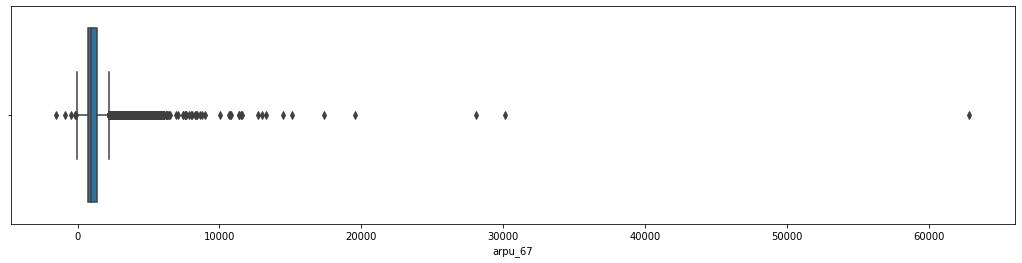

In [290]:
# Boxplot of arpu_67

plt.figure(figsize = (18,4))
sns.boxplot(x='arpu_67', data=high_value)
plt.show()

In [291]:
high_value['arpu_67'].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99])

count    30011.000000
mean      1176.419831
std        818.012294
min      -1499.566000
25%        762.544500
50%        971.205000
75%       1348.984000
90%       1898.861000
95%       2375.972000
98%       3096.939200
99%       3735.631500
max      62876.922000
Name: arpu_67, dtype: float64

In [292]:
high_value = high_value[high_value['arpu_67'] <= 3735.6315]

In [293]:
high_value.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,night_pck_user_8,aon,aug_vbc_3g,tot_rech_amt_67,avg_rech_amt_67,y,count_rech_data_8,arpu_67,onnet_mou_67,offnet_mou_67,roam_ic_mou_67,roam_og_mou_67,loc_og_t2t_mou_67,loc_og_t2m_mou_67,loc_og_t2f_mou_67,loc_og_t2c_mou_67,loc_og_mou_67,std_og_t2t_mou_67,std_og_t2m_mou_67,std_og_t2f_mou_67,std_og_mou_67,isd_og_mou_67,spl_og_mou_67,og_others_67,total_og_mou_67,loc_ic_t2t_mou_67,loc_ic_t2m_mou_67,loc_ic_t2f_mou_67,loc_ic_mou_67,std_ic_t2t_mou_67,std_ic_t2m_mou_67,std_ic_t2f_mou_67,std_ic_mou_67,total_ic_mou_67,spl_ic_mou_67,isd_ic_mou_67,ic_others_67,total_rech_num_67,max_rech_amt_67,last_day_rch_amt_67,total_rech_data_67,max_rech_data_67,av_rech_amt_data_67,vol_data_mb_67,vol_data_mb_8,night_pck_user_67,vbc_data_67,count_rech_data_67
7,7.000702e+09,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7.0,3638.0,1580.0,779.0,0.0,0.0,0.0,0.0,802.0,57.74,2370.0,1185.0,1.0,0.0,2419.030,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.0,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,10.0,1580.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,38.12,0.0
8,7.001525e+09,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14.0,120.0,30.0,10.0,3.0,23.0,69.0,0.0,315.0,21.03,1038.0,519.0,0.0,3.0,870.944,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.0,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,40.0,154.0,0.0,2.0,154.0,88.5,1106.95,11.97,0.0,1032.81,2.0
13,7.002192e+09,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11.0,717.0,130.0,0.0,3.0,23.0,69.0,0.0,2607.0,0.00,760.0,380.0,0.0,3.0,698.517,610.15,532.59,167.77,43.24,55.82,198.41,4.54,0.0,258.79,532.39,308.30,0.00,840.71,0.00,0.00,0.00,1099.50,75.46,161.41,4.81,241.69,153.97,337.92,0.00,491.90,1141.19,0.45,307.39,99.72,10.0,110.0,50.0,0.0,0.0,0.0,0.00,0.02,0.0,0.00,0.0
16,7.000876e+09,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2.0,160.0,130.0,130.0,0.0,0.0,0.0,0.0,511.0,0.00,918.0,459.0,0.0,0.0,730.844,124.52,526.03,2.83,17.74,107.77,419.28,4.48,0.0,531.55,10.47,87.50,0.00,97.98,0.00,3.26,0.00,632.82,112.77,376.50,17.39,506.69,147.43,91.76,0.51,239.72,746.42,0.00,0.00,0.00,16.0,110.0,100.0,0.0,0.0,0.0,0.00,0.00,0.0,24.34,0.0
17,7.000187e+09,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,667.0,0.00,816.0,408.0,0.0,0.0,708.988,1195.19,61.64,4.76,8.46,38.99,58.54,0.00,0.0,97.54,1147.72,1.55,0.00,1149.27,0.00,2.58,0.93,1250.34,34.54,49.72,0.00,84.27,8.63,1.28,0.00,9.91,94.19,0.00,0.00,0.00,21.0,110.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0


In [294]:
high_value.shape

(29710, 86)

## Exploratory Data Analysis (EDA) (including handling outliers)

### i. Univariate Analysis

Let's first see the variables related to the revenue of the customers.

Some key revenue variables are: <br>
1. arpu (Average Revenue per User)
2. total_rech_num (Total number of recharges)
3. total_rech_amt (Total recharge amount)
4. max_rech_amt (Maximum recharge amount)
5. last_day_rch_amt (Last Day recharge amount)
6. total_rech_data (Total number of mobile internet recharges)
7. max_rech_data (Maximum amount of mobile internet recharge)
8. count_rech_2g (Number of 2G recharges)
9. count_rech_3g (Number of 3G recharges)
10. av_rech_amt_data (Average amount of mobile internet recharge)
11. vbc_3g (Volume based cost)

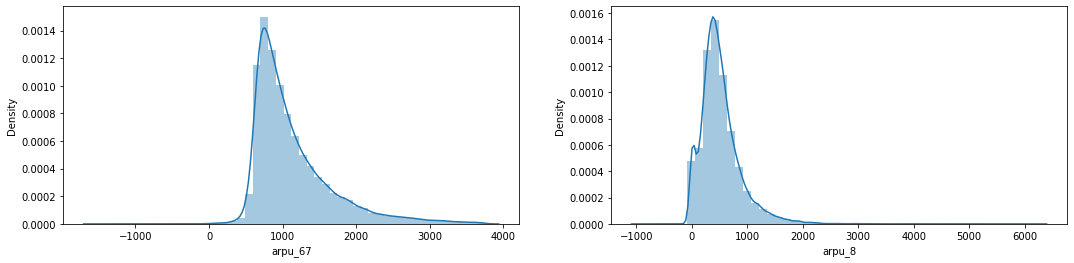

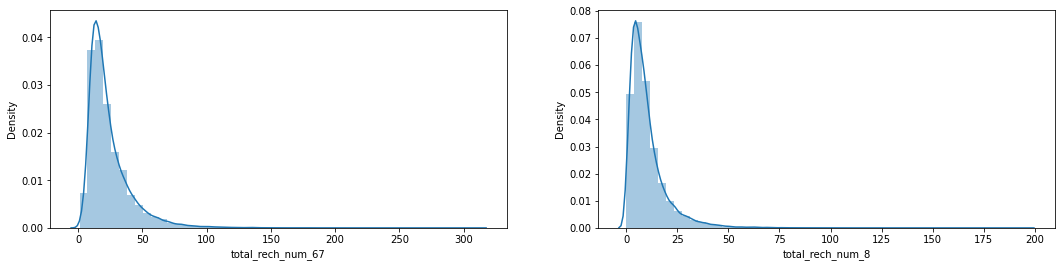

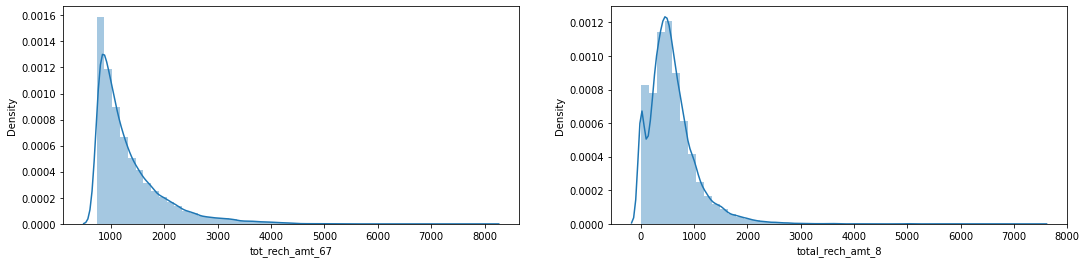

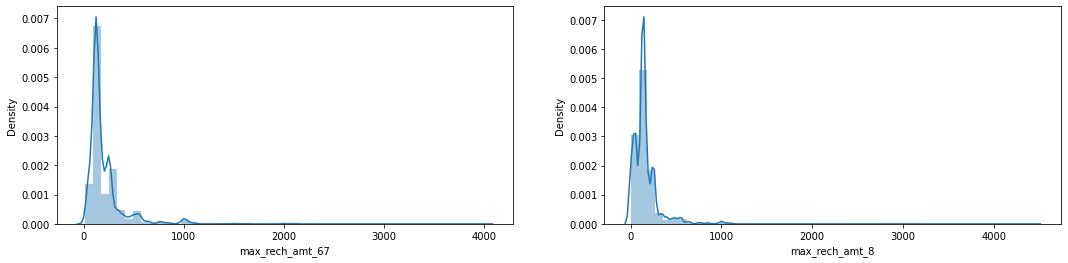

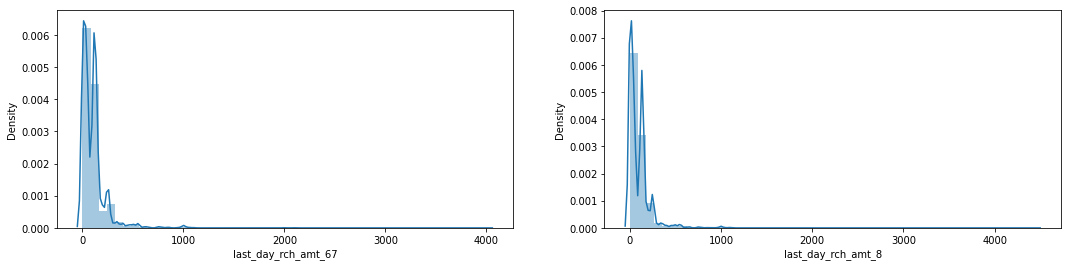

In [295]:
# Histograms of revenue variables

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['arpu_67'], ax = axes[0])
sns.distplot(high_value['arpu_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['total_rech_num_67'], ax = axes[0])
sns.distplot(high_value['total_rech_num_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['tot_rech_amt_67'], ax = axes[0])
sns.distplot(high_value['total_rech_amt_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['max_rech_amt_67'], ax = axes[0])
sns.distplot(high_value['max_rech_amt_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['last_day_rch_amt_67'], ax = axes[0])
sns.distplot(high_value['last_day_rch_amt_8'], ax = axes[1])
plt.show()

The average revenue per person is around 700 for most people in both months and there are some customers with negative ARPU even though they are high value customers. <br>
We can also see that the distribution is similar in action phase although there are a few more high ARPU customers. <br>
More customers are recharging with lesser total recharge amounts in the action phase than in the good phase. There are almost no customers with a total recharge amount less than about 600 in the good phase but a lot of customers have low recharge amounts in the action phase. 

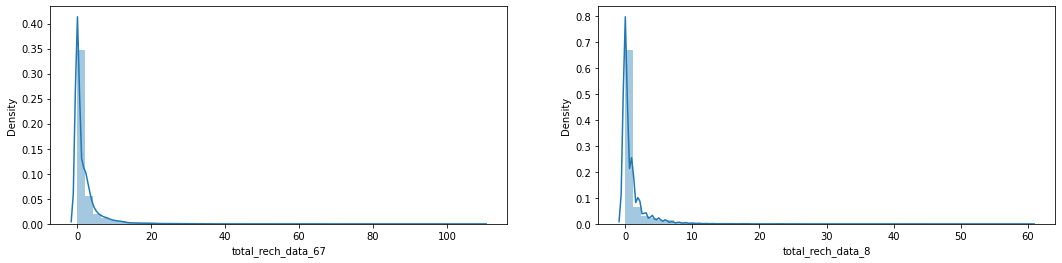

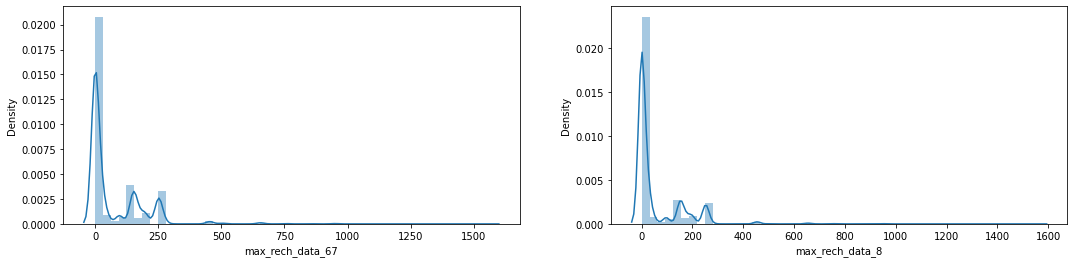

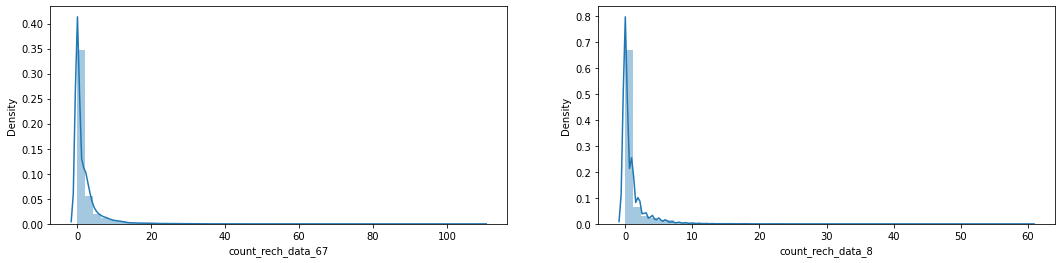

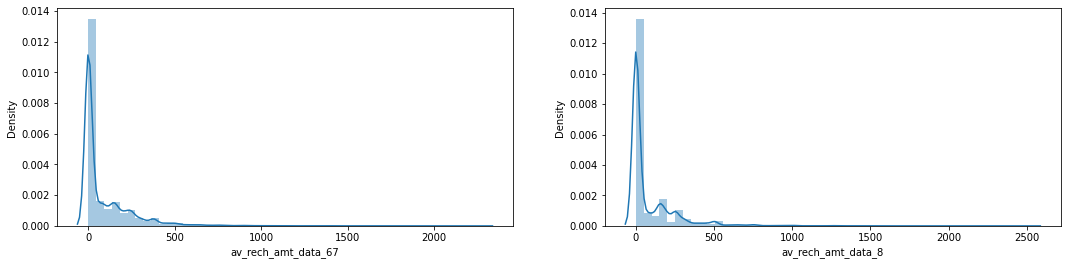

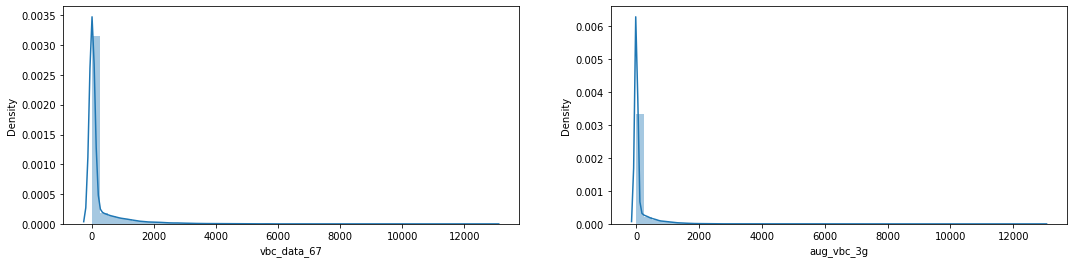

In [296]:
# Histograms of mobile internet revenue variables

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['total_rech_data_67'], ax = axes[0])
sns.distplot(high_value['total_rech_data_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['max_rech_data_67'], ax = axes[0])
sns.distplot(high_value['max_rech_data_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['count_rech_data_67'], ax = axes[0])
sns.distplot(high_value['count_rech_data_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['av_rech_amt_data_67'], ax = axes[0])
sns.distplot(high_value['av_rech_amt_data_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['vbc_data_67'], ax = axes[0])
sns.distplot(high_value['aug_vbc_3g'], ax = axes[1])
plt.show()

Similar to the total recharge amounts, very few people spend large amounts on mobile internet. But some data packs are more common like the ones at Rs 10, Rs 100 and Rs 250.

Also, if we compare the graphs of the good phase and action phase, we can see that the action phase graphs are more noisy, indicating lesser data points in the action phase, which means that some customers are already not using any services in the action phase. 

Now, let's see the distribution of minutes of usage variables for June only as the distribution over other months will be similar.

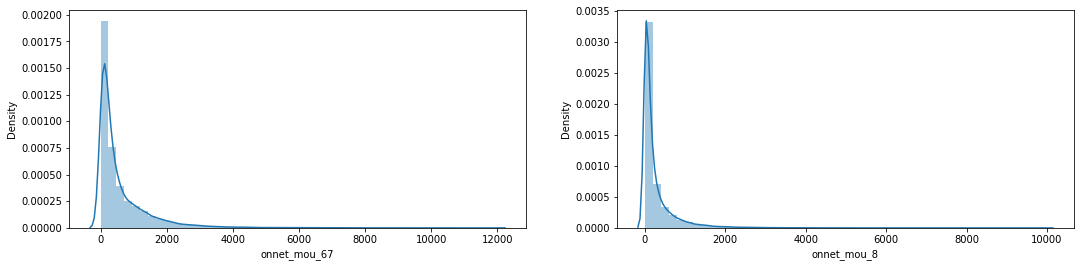

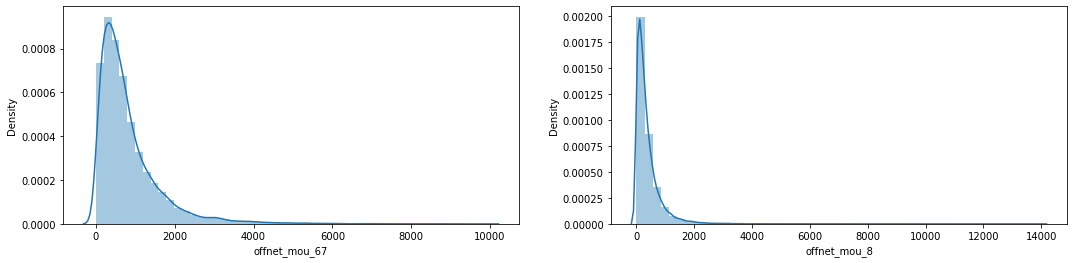

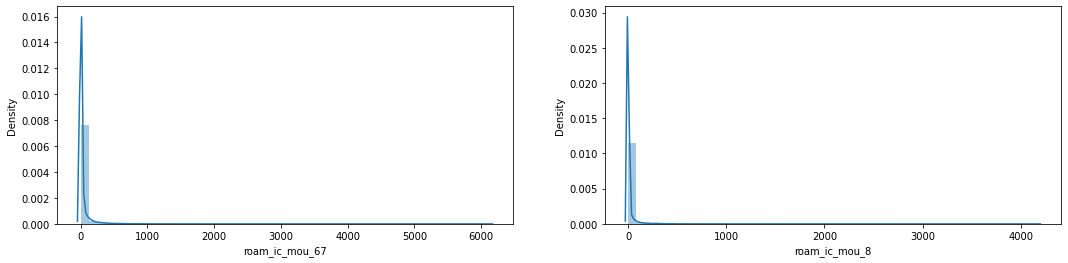

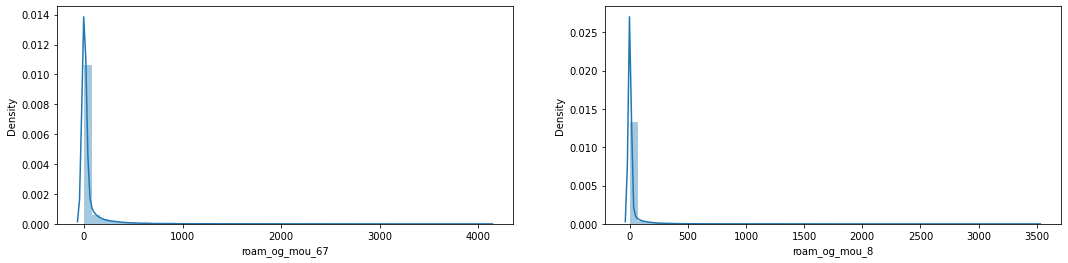

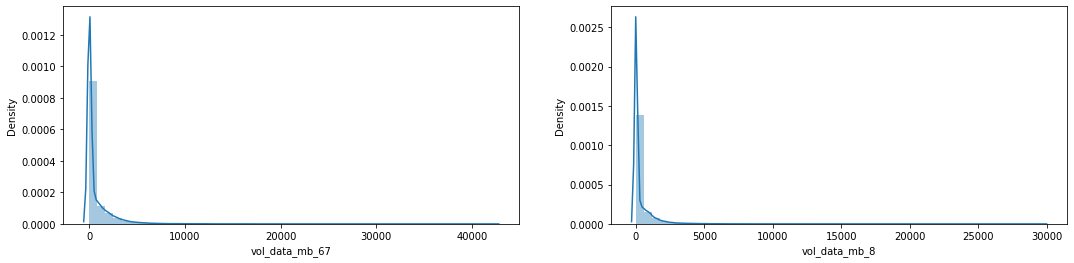

In [297]:
# Histograms of usage variables

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['onnet_mou_67'], ax = axes[0])
sns.distplot(high_value['onnet_mou_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['offnet_mou_67'], ax = axes[0])
sns.distplot(high_value['offnet_mou_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['roam_ic_mou_67'], ax = axes[0])
sns.distplot(high_value['roam_ic_mou_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['roam_og_mou_67'], ax = axes[0])
sns.distplot(high_value['roam_og_mou_8'], ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.distplot(high_value['vol_data_mb_67'], ax = axes[0])
sns.distplot(high_value['vol_data_mb_8'], ax = axes[1])
plt.show()

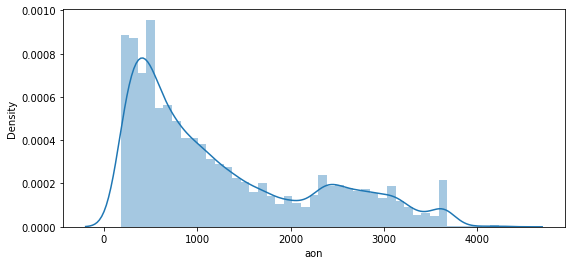

In [298]:
# Histogram of age on network

plt.figure(figsize = (9,4))
sns.distplot(high_value['aon'])
plt.show()

Age on network for customers
does not seem to be normally distributed, with most customers having age between 0-1000 and another prominent group of customers with 2000-3000 value.

### ii. Bivariate Analysis

Let's first look at how the above variables are related to the target variable.

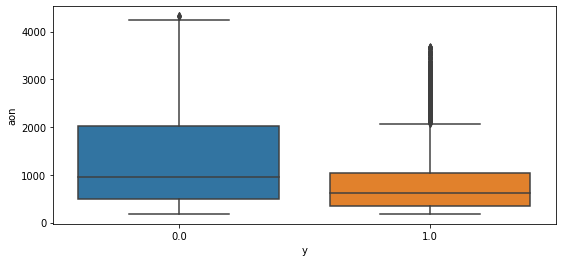

In [299]:
# Age on network vs churn

plt.figure(figsize = (9,4))
sns.boxplot(x='y', y='aon', data=high_value)
plt.show()

We can clearly see that people who are new on the network are more likely to churn.

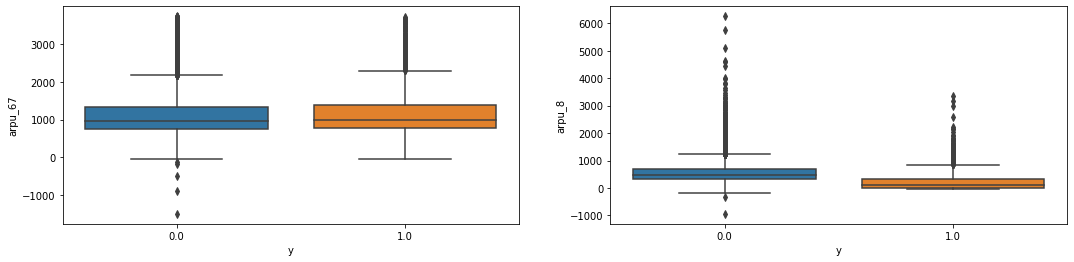

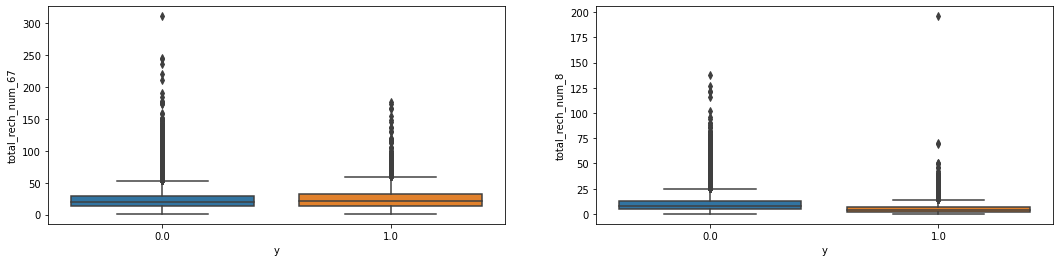

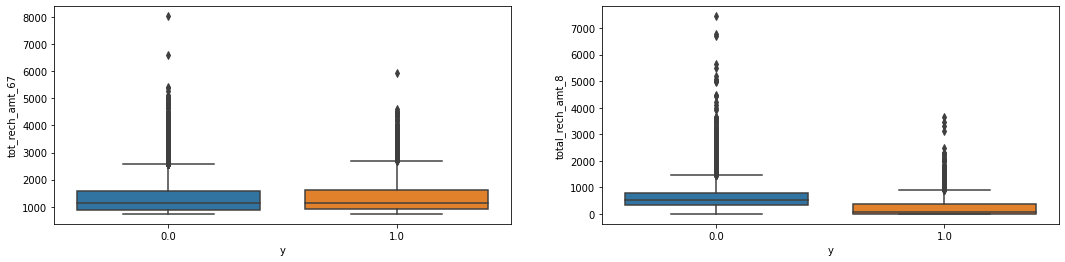

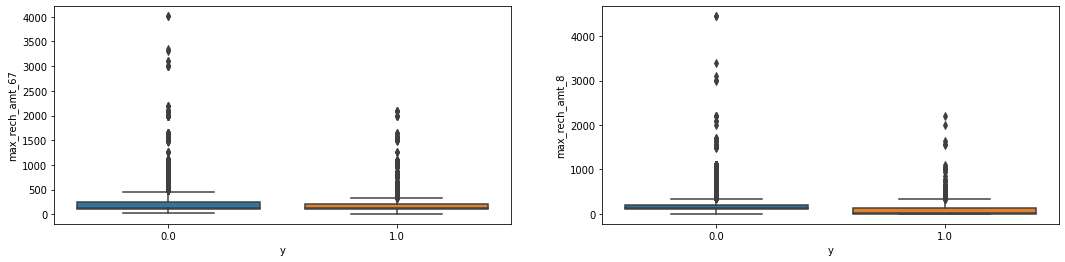

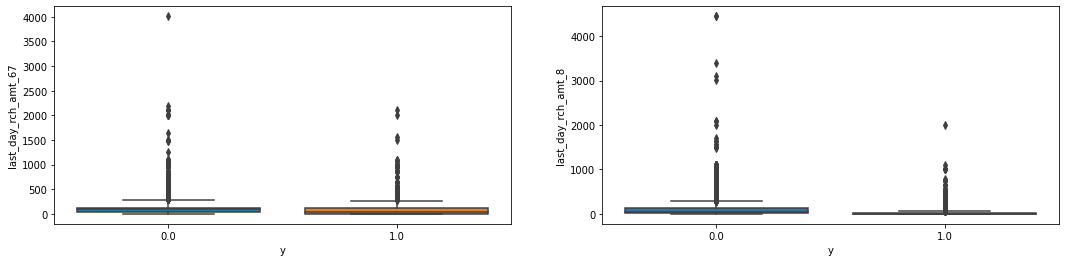

In [300]:
# Boxplots of revenue variables vs target

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='arpu_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='arpu_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='total_rech_num_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='total_rech_num_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='tot_rech_amt_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='total_rech_amt_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='max_rech_amt_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='max_rech_amt_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='last_day_rch_amt_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='last_day_rch_amt_8', data=high_value, ax = axes[1])
plt.show()

Here, we can notice a distinct difference in the behaviour of the customers in the good phase and the action phase. There is not a noticeable difference in the churned and non churned customers in the good phase. However, in the action phase, we can clearly see that customers with more revenue are more likely to retain. <br>
So, a lot of customers are showing patterns in the action phase that indicate a likely churn in the churn phase.

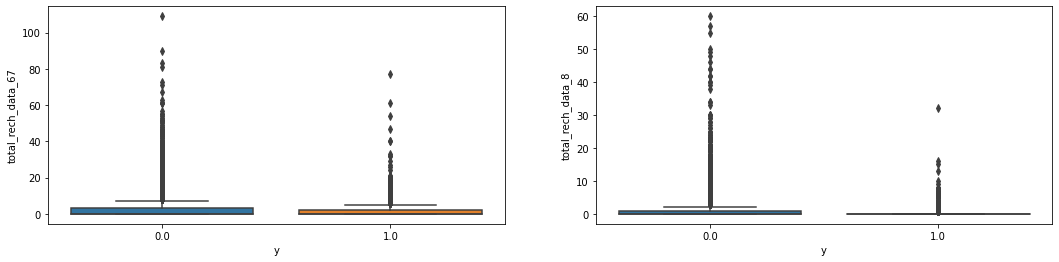

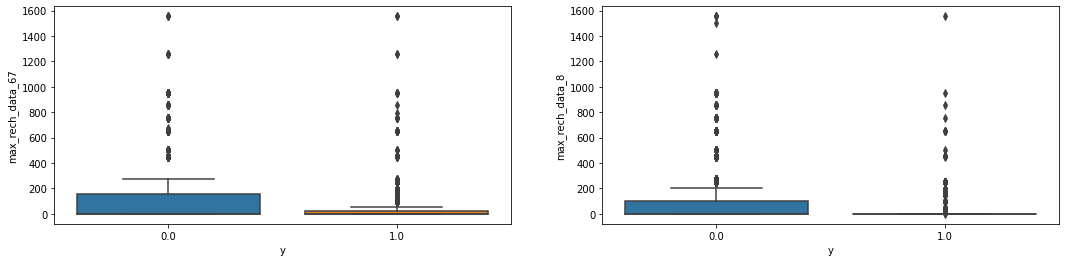

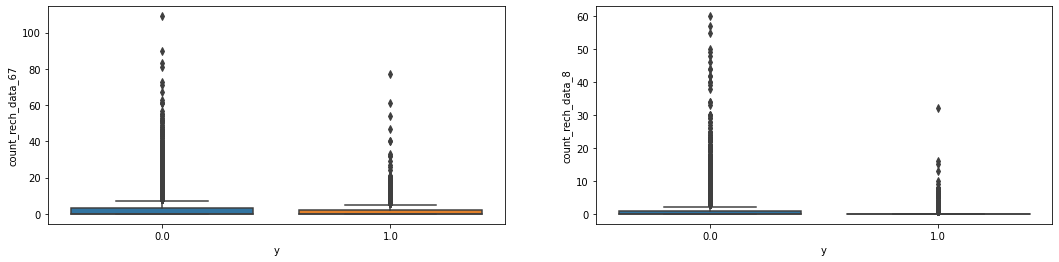

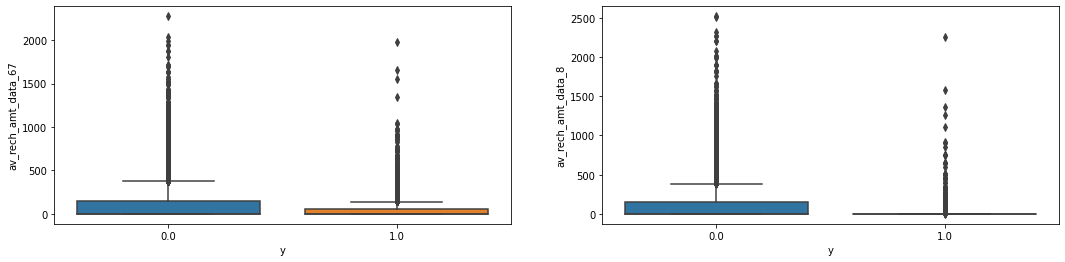

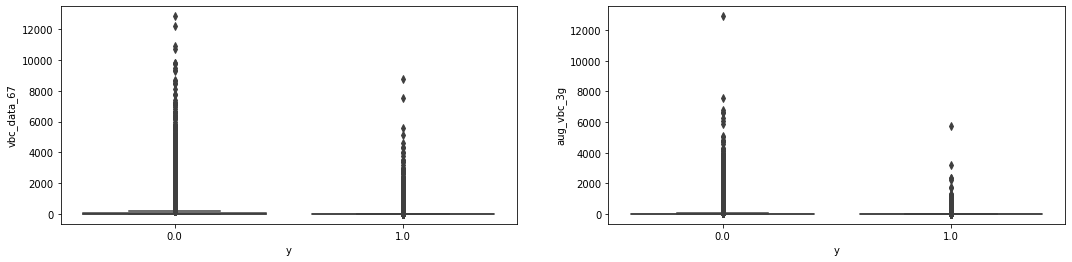

In [301]:
# Boxplots of mobile internet revenue variables vs target

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='total_rech_data_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='total_rech_data_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='max_rech_data_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='max_rech_data_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='count_rech_data_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='count_rech_data_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='av_rech_amt_data_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='av_rech_amt_data_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='vbc_data_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='aug_vbc_3g', data=high_value, ax = axes[1])
plt.show()

In mobile internet revenue, customers that are already using lesser mobile internet are more likely to churn. But the difference is even more pronounced in the action phase. 

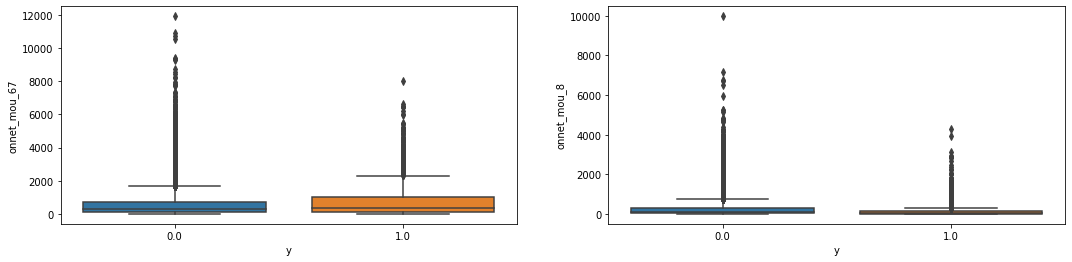

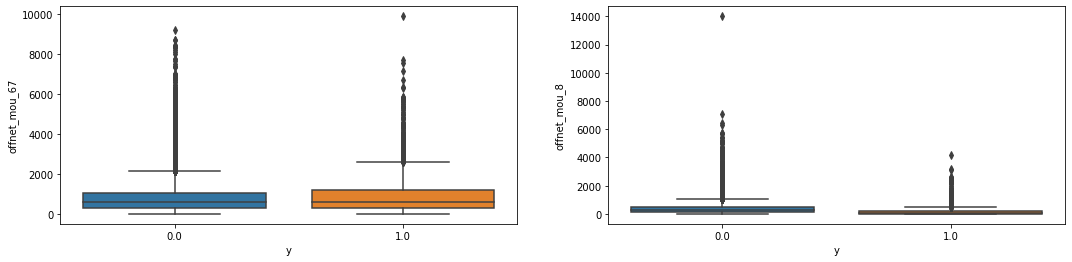

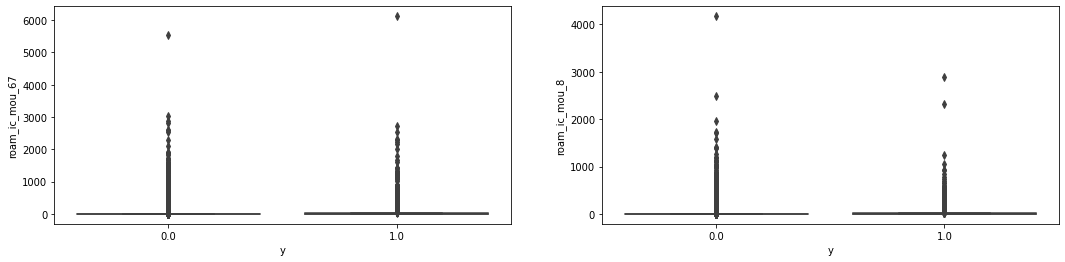

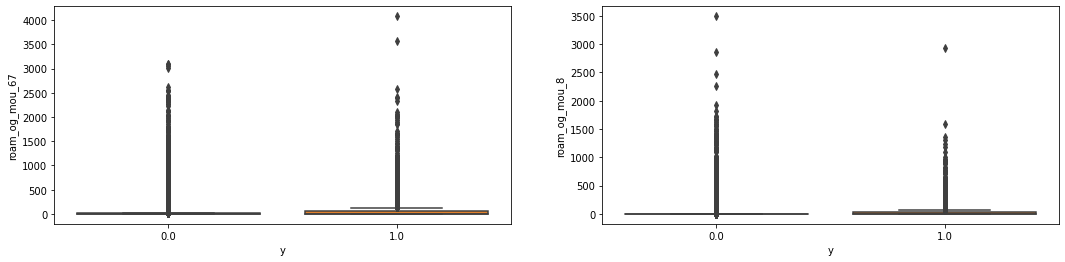

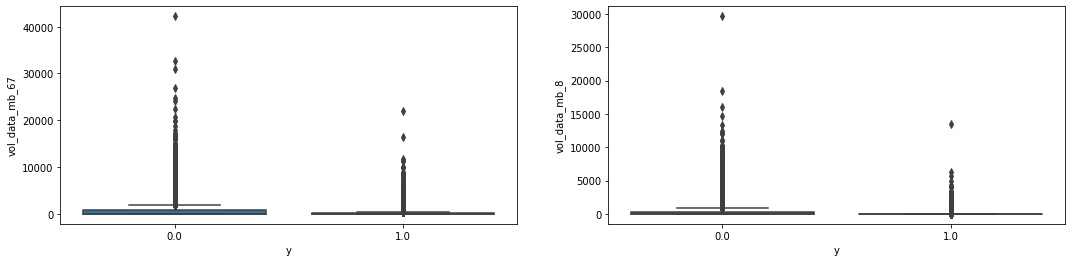

In [302]:
# Boxplots of usage variables vs target

fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='onnet_mou_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='onnet_mou_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='offnet_mou_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='offnet_mou_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='roam_ic_mou_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='roam_ic_mou_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='roam_og_mou_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='roam_og_mou_8', data=high_value, ax = axes[1])
plt.show()
fig, axes = plt.subplots(1, 2, figsize = (18,4))
sns.boxplot(x='y', y='vol_data_mb_67', data=high_value, ax = axes[0])
sns.boxplot(x='y', y='vol_data_mb_8', data=high_value, ax = axes[1])
plt.show()

In the usage metrics,  we see a similar pattern as overall revenue as usage drops in the action phase itself.

Now, let's see the correlation plots of revenue variables.

In [303]:
rev_vars = ['arpu_67', 'total_rech_num_67', 'tot_rech_amt_67', 'max_rech_amt_67', 'last_day_rch_amt_67', 'total_rech_data_67', 
            'max_rech_data_67', 'count_rech_data_67', 'av_rech_amt_data_67', 'vbc_data_67', 'arpu_8', 'total_rech_num_8', 
            'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_data_8', 
            'av_rech_amt_data_8', 'aug_vbc_3g', 'y']

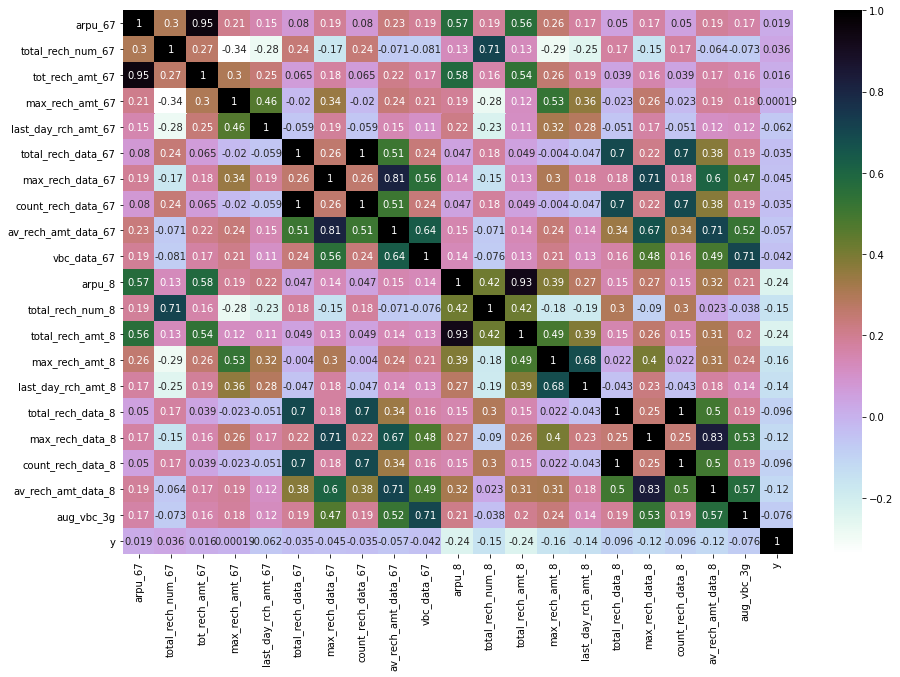

In [304]:
# Plotting correlation matrix for revenue variables

plt.figure(figsize = (15,10))
sns.heatmap(high_value[rev_vars].corr(), annot = True, cmap = "cubehelix_r")
plt.show()

In [305]:
# Dropping highly correlated variables

high_corr_var = ['tot_rech_amt_67', 'total_rech_amt_8', 'count_rech_data_67', 'count_rech_data_8']
high_value.drop(high_corr_var, axis = 1, inplace = True)

In [306]:
rev_vars_2 = ['arpu_67', 'total_rech_num_67', 'max_rech_amt_67', 'last_day_rch_amt_67', 'total_rech_data_67', 
            'max_rech_data_67', 'av_rech_amt_data_67', 'vbc_data_67', 'arpu_8', 'total_rech_num_8', 
            'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 
            'av_rech_amt_data_8', 'aug_vbc_3g']

In [307]:
high_value_usage = high_value.drop(rev_vars_2, axis = 1)

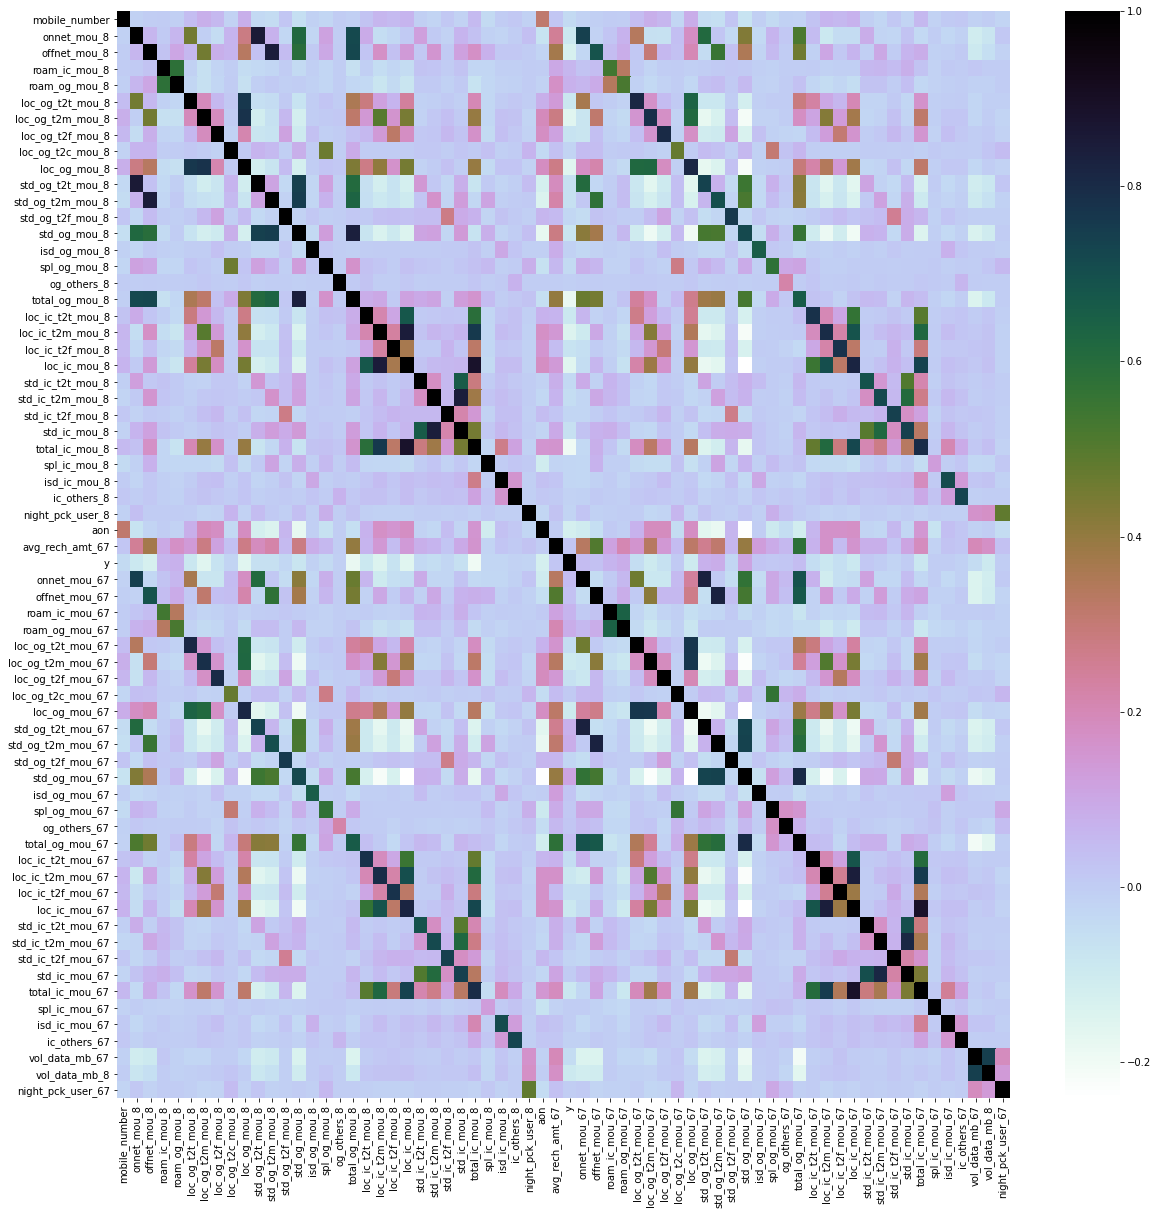

In [308]:
# Plotting correlation matrix for revenue variables

plt.figure(figsize = (20,20))
sns.heatmap(high_value_usage.corr(), annot = False, cmap = "cubehelix_r")
plt.show()

From this pattern, we can see that there are no two variables that are highly correlated. Although the same variable for the good phase and action phase are somewhat correlated. 

Furthermore, no single variable seems to be correlated with the target variable.

## 5. Data Preprocessing

In [309]:
high_value.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,night_pck_user_8,aon,aug_vbc_3g,avg_rech_amt_67,y,arpu_67,onnet_mou_67,offnet_mou_67,roam_ic_mou_67,roam_og_mou_67,loc_og_t2t_mou_67,loc_og_t2m_mou_67,loc_og_t2f_mou_67,loc_og_t2c_mou_67,loc_og_mou_67,std_og_t2t_mou_67,std_og_t2m_mou_67,std_og_t2f_mou_67,std_og_mou_67,isd_og_mou_67,spl_og_mou_67,og_others_67,total_og_mou_67,loc_ic_t2t_mou_67,loc_ic_t2m_mou_67,loc_ic_t2f_mou_67,loc_ic_mou_67,std_ic_t2t_mou_67,std_ic_t2m_mou_67,std_ic_t2f_mou_67,std_ic_mou_67,total_ic_mou_67,spl_ic_mou_67,isd_ic_mou_67,ic_others_67,total_rech_num_67,max_rech_amt_67,last_day_rch_amt_67,total_rech_data_67,max_rech_data_67,av_rech_amt_data_67,vol_data_mb_67,vol_data_mb_8,night_pck_user_67,vbc_data_67
7,7.000702e+09,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7.0,1580.0,779.0,0.0,0.0,0.0,0.0,802.0,57.74,1185.0,1.0,2419.030,112.52,1020.59,49.72,36.33,82.77,756.01,117.27,0.0,956.07,27.59,81.65,26.74,136.00,0.18,4.50,0.00,1096.77,90.40,439.05,253.62,783.11,48.72,218.43,86.43,353.62,1184.50,0.21,16.59,30.93,10.0,1580.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,38.12
8,7.001525e+09,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14.0,30.0,10.0,3.0,23.0,69.0,0.0,315.0,21.03,519.0,0.0,870.944,764.72,175.29,0.00,0.00,514.72,151.54,0.00,0.0,666.27,249.99,23.73,0.00,273.74,0.00,0.00,0.00,940.02,33.68,71.56,0.00,105.26,0.58,26.51,0.00,27.09,132.35,0.00,0.00,0.00,40.0,154.0,0.0,2.0,154.0,88.5,1106.95,11.97,0.0,1032.81
13,7.002192e+09,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11.0,130.0,0.0,3.0,23.0,69.0,0.0,2607.0,0.00,380.0,0.0,698.517,610.15,532.59,167.77,43.24,55.82,198.41,4.54,0.0,258.79,532.39,308.30,0.00,840.71,0.00,0.00,0.00,1099.50,75.46,161.41,4.81,241.69,153.97,337.92,0.00,491.90,1141.19,0.45,307.39,99.72,10.0,110.0,50.0,0.0,0.0,0.0,0.00,0.02,0.0,0.00
16,7.000876e+09,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2.0,130.0,130.0,0.0,0.0,0.0,0.0,511.0,0.00,459.0,0.0,730.844,124.52,526.03,2.83,17.74,107.77,419.28,4.48,0.0,531.55,10.47,87.50,0.00,97.98,0.00,3.26,0.00,632.82,112.77,376.50,17.39,506.69,147.43,91.76,0.51,239.72,746.42,0.00,0.00,0.00,16.0,110.0,100.0,0.0,0.0,0.0,0.00,0.00,0.0,24.34
17,7.000187e+09,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.0,30.0,0.0,0.0,0.0,0.0,0.0,667.0,0.00,408.0,0.0,708.988,1195.19,61.64,4.76,8.46,38.99,58.54,0.00,0.0,97.54,1147.72,1.55,0.00,1149.27,0.00,2.58,0.93,1250.34,34.54,49.72,0.00,84.27,8.63,1.28,0.00,9.91,94.19,0.00,0.00,0.00,21.0,110.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00


In [310]:
high_value.shape

(29710, 82)

In [311]:
# Creating target and feature dataframe

X = high_value.drop('y',axis=1)
y = high_value[['y']]

In [312]:
# Handling Imbalanced Data using SMOTE

os = SMOTE(random_state=0)

In [313]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=10, stratify=y)

In [314]:
allcols = list(X_train.columns)

In [315]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns = allcols )
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

In [316]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  38016
Number of no subscription in oversampled data 19008
Number of subscription 19008
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now it seems that the class imbalance is taken care of. We can now use Scale the data and use ML algorithms on this data to identify the key indicators.

In [317]:
# Scaling the data
scaler = StandardScaler()
os_data_X[allcols] = scaler.fit_transform(os_data_X[allcols])
X_test[allcols] = scaler.transform(X_test[allcols])

In [318]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [319]:
y_1 = list(os_data_y.value_counts())[1]
y_0 = os_data_y.shape[0] - y_1

In [320]:

scale_pos_weight_ = y_0/y_1
xgb_model = xgb.XGBClassifier(scale_pos_weight = scale_pos_weight_)

In [321]:
# Default-Run of default-hyperparameters
parameters = {'learning_rate': [0.3],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [100]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(os_data_X, os_data_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1.0, seed=None,
                                     silent=None, subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6],
                         'min_child_weight': [1], 'n_estimators': [100]},
             pre_dispatch='2*n_jobs'

In [322]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100}
0.9909313544283852
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=None,
              silent=None, subsample=1, verbosity=1)


We can see that the for learning rate of 0.3, max depth of 6 and minimum child weight 1 we are getting the score of 0.99 for "balanced-scaled" train data.
Now let's look at the scores for test data.

In [327]:
clf_xgb.fit(os_data_X, os_data_y)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=os_data_y,
                                                              y_score=clf_xgb.predict_proba(os_data_X)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=clf_xgb.predict_proba(X_test)[:, 1]))

AUC on train data by XGBoost = 0.9999627958793178
AUC on test data by XGBoost = 0.9136274720381716


We can observe tha the AUC score using XGBoost on test data is 0.91.
Whereas, for train data is 0.99. We can be sure that the classification using the selected parameters might give us good predction strength.
Now, it would be interesting to reduce the dimensionality of the data. 

## 6. Pricipal Component Analysis Model

### i. PCA

In [328]:
pca = PCA(random_state=42)

In [329]:
pca.fit(os_data_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [330]:
pca.components_

array([[ 3.38131246e-02,  2.02938856e-01,  6.95495645e-02, ...,
         1.20674339e-01,  8.42773165e-03,  1.00801403e-01],
       [-1.58901100e-02,  1.17787855e-01,  2.11617452e-01, ...,
        -1.34901044e-01, -5.15019280e-03, -1.32104880e-01],
       [-2.33500929e-02,  1.52164110e-01,  7.18670386e-02, ...,
         2.73782590e-01,  5.28308725e-02,  2.14271860e-01],
       ...,
       [ 2.67177075e-08,  3.19940189e-07,  7.46914395e-06, ...,
        -1.72211981e-07,  3.58163596e-08, -2.11741742e-07],
       [-7.14455465e-08, -9.22641017e-08, -1.51559587e-06, ...,
         5.69700439e-08,  3.26096498e-08, -5.81547127e-08],
       [ 9.13771733e-09,  2.43802390e-07,  3.47268778e-06, ...,
         5.75393699e-08, -4.99067224e-08,  4.66791180e-08]])

In [331]:
pca.explained_variance_ratio_

array([1.19555237e-01, 9.50232187e-02, 6.86995919e-02, 4.91550025e-02,
       4.10188629e-02, 3.85416401e-02, 3.24231991e-02, 3.01985675e-02,
       2.82518186e-02, 2.75205795e-02, 2.44033333e-02, 2.42651540e-02,
       2.22781856e-02, 2.02616117e-02, 1.98858650e-02, 1.75535074e-02,
       1.68419872e-02, 1.53853227e-02, 1.47879063e-02, 1.46242559e-02,
       1.38831170e-02, 1.36157887e-02, 1.32523991e-02, 1.27768083e-02,
       1.21844859e-02, 1.10974323e-02, 1.08608051e-02, 1.03794885e-02,
       1.03461617e-02, 9.89554552e-03, 9.51688281e-03, 9.23504860e-03,
       8.83405628e-03, 8.54929945e-03, 8.47519895e-03, 8.15244292e-03,
       7.91067496e-03, 7.53307900e-03, 7.41224477e-03, 7.08761095e-03,
       6.66661261e-03, 5.90935476e-03, 4.55809163e-03, 4.43831395e-03,
       4.20194146e-03, 4.13295255e-03, 4.01532691e-03, 3.90526135e-03,
       3.68964325e-03, 3.45771777e-03, 3.33222228e-03, 3.28751437e-03,
       3.17275792e-03, 3.09437449e-03, 2.94639014e-03, 2.89055229e-03,
      

In [332]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

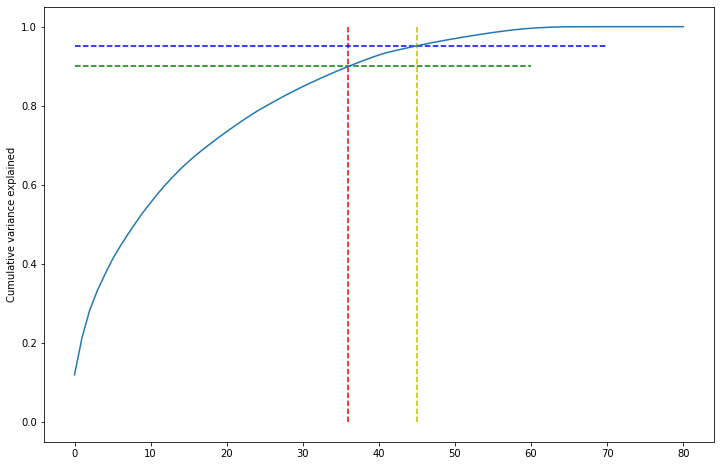

In [333]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=36, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=60, xmin=0, colors="g", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="b", linestyles="--")
plt.vlines(x=45, ymax=1, ymin=0, colors="y", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [334]:
pca_final = IncrementalPCA(n_components = 45)

In [335]:
df_train_pca = pca_final.fit_transform(os_data_X)

In [336]:
df_train_pca.shape

(38016, 45)

In [337]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [338]:
corrmat.shape

(45, 45)

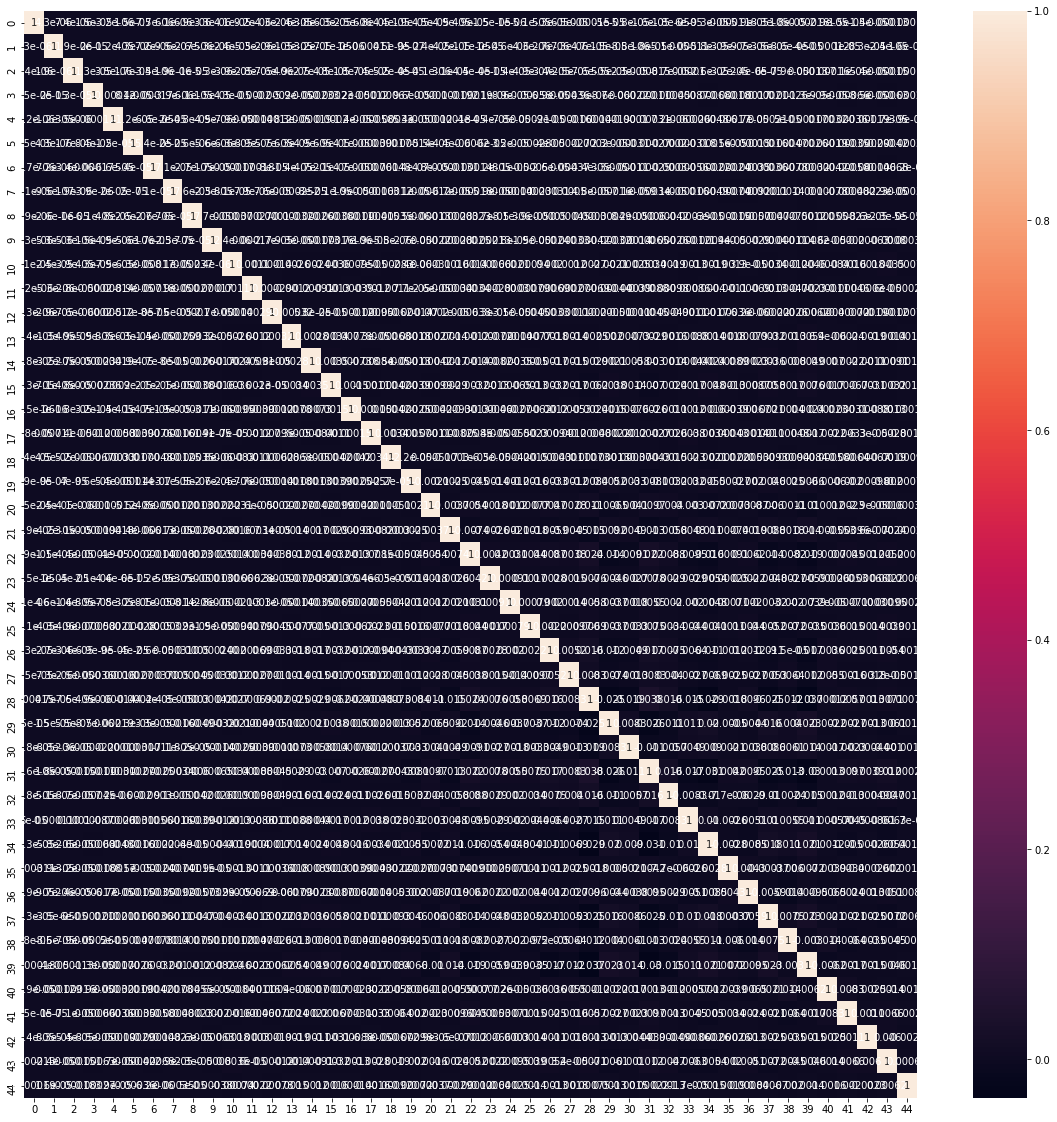

In [339]:
plt.figure(figsize=[20,20])
sns.heatmap(corrmat, annot=True)

In [345]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8913, 45)

In [347]:
# Learning logistic regression after PCA
learner_pca = LogisticRegression()

In [348]:
model_pca = learner_pca.fit(df_train_pca, os_data_y)

In [349]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [350]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

We can observe that the AUC score of 0.89 is achieved after using PCA on the data which originally has high number of features. PCA did reduce the number of dimensions with maitaining good AUC score of 0.89 on test data, which is qiet close to the AUC score achieved after using the XGBoost algorithm (0.91).

# Recommendations

The business objective of this analysis is to predict the churn in the September month using the features from the first three months. We tried to understand the typical customer behaviour during churn. To do this we implemented XGBoost algorithm to identfy hidden patterns in the data which are key in identifying the Churn customers. These features can be taken forward for further analysis to the Churn in the future months. 
Also, any drop in revenue in the action phase will indicate a higher chance of churn, especially in new customers.
The key attributes which company can look into are as follows:
The amount of recharge in action phase, the difference of recharge amount between good phase and action phase, difference between minutes of usage between good phase and action phase, age on network